
#        NEURAL NETWORKS AND DEEP LEARNING FOR FINANCE     


##  Download history data from yahoo finance

In [ ]:
pip install scikeras

In [ ]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd
import plotly.graph_objs as go

import statsmodels as sm
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

import keras
from keras.layers import Dense, Input, Dropout
from keras import Sequential
from keras.models import Sequential
from keras.layers import LSTM
from scikeras.wrappers import KerasRegressor
from keras.callbacks import EarlyStopping
import keras.utils
from keras import utils as np_utils

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
keras.utils.set_random_seed(812)

In [ ]:
MyTicker = yf.Ticker("NFLX")

## Question 1

Netflix, Inc. provides entertainment services. It offers TV series, documentaries, feature films, and games across various genres and languages. The company also provides members the ability to receive streaming content through a host of internet-connected devices, including TVs, digital video players, TV set-top boxes, and mobile devices. It has operations in approximately 190 countries. The company was incorporated in 1997 and is headquartered in Los Gatos, California.

Netflix had remained a market leader and stable company until the first quarter of 2022 when they reported a loss in subscribers which caused their stock price to drop drastically, in the last few days it has managed to increase its value reaching almost the same historical maximum value.



In [ ]:
# get historical market data from yahoo finance
data_s = MyTicker.history(period="max")
data_s['Date'] = data_s.index

In [ ]:
# Question 2: check data and provide statistical description of stock price, Explain?
import pandas as pd
pd.set_option('display.max_columns', 500) # To be able to see all the columns of the describe method
print(data_s.describe())
data_s.head(5)

              Open         High          Low        Close        Volume  \
count  5491.000000  5491.000000  5491.000000  5491.000000  5.491000e+03   
mean    136.374277   138.464381   134.223362   136.394196  1.580201e+07   
std     177.763050   180.272874   175.123768   177.729096  1.867072e+07   
min       0.377857     0.410714     0.346429     0.372857  2.856000e+05   
25%       4.142857     4.214286     4.064286     4.142143  5.830050e+06   
50%      34.942856    35.401428    34.342857    34.959999  9.913500e+06   
75%     269.455002   275.505005   264.379990   269.700012  1.869350e+07   
max     692.349976   700.989990   686.090027   691.690002  3.234140e+08   

       Dividends  Stock Splits  
count     5491.0   5491.000000  
mean         0.0      0.001639  
std          0.0      0.098241  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      7.000000  


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,0.0,0.0,2002-05-23 00:00:00-04:00
2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,0.0,0.0,2002-05-24 00:00:00-04:00
2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,0.0,0.0,2002-05-28 00:00:00-04:00
2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,0.0,0.0,2002-05-29 00:00:00-04:00
2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,0.0,0.0,2002-05-30 00:00:00-04:00


## Question 2
From the description we can see that we have 5481 days of data which is equal to 15 years, along those 15 years the mean price of the stock is 135.51, it has a stardard deviation of 176.76 which is very high but is understandable since the maximum price is 700 and the lowest is 0.34. For the volume the mean is 1.58e10 with also a standard deviation higher than the mean with a minimum value of 2.85e10 and a maximum of 3.23e8.

This data can tell us that the stock price has changed a lot over the time, so it will be interesting to see the time series plot to work forward.

## Analysis of time series of Stock Price

In [ ]:
# Extracting Date, Open, High, Low and Close from the Dataframe.
data = data_s[['Date','Close','Open', 'High', 'Low','Volume']]

In [ ]:
# Plot time series the close price and volume of stock price
# Question 3: Explain the time series plots and try to identify important events

fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= data['Close'])])
fig.update_layout(title="Closing price",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

fig=go.Figure(data=[go.Scatter(name = 'Volume',x= data['Date'],y= data['Volume'])])
fig.update_layout(title="Volume",xaxis_title="Date", yaxis_title="Volume")
fig.show()


## Question 3
From the closing price time series we get that from the start of the stock until 2011, the price was low, this could because during those years, streaming wasn't the most popular option to watch movies or series, it was Blockbuster. With the start of the streaming era the price started to increase getting a price of around 300. With the start of the lock-up, Nteflix shares took off to reach an all-time high of 691 in November 2021. In the first quarter of 2022, Netflix reported a significant drop in the number of subscribers, due to the emergence of new streaming platforms, which led to a decrease in the share price to 166 in May 2022. Since then, and with the appearance of new features in Netflix, the stock has been rising again.

From the volume time series it can be seen that usually the volume of shares is less than 100 million, however, it can be noted that in 2004 Netflix shares were very popular with a high of 323 in October 2004. Similarly, in late 2010 and early 2011 it started to have a high volume due to the beginning of the streaming era reaching a high of 315 in October 2011, the volume remained high during the following months until it stabilized around 30 M in 2016.



In [ ]:
data = data_s[['Date','Close']]
print(data.head(2))
print(data.tail(2))

                                               Date     Close
Date                                                         
2002-05-23 00:00:00-04:00 2002-05-23 00:00:00-04:00  1.196429
2002-05-24 00:00:00-04:00 2002-05-24 00:00:00-04:00  1.210000
                                               Date      Close
Date                                                          
2024-03-14 00:00:00-04:00 2024-03-14 00:00:00-04:00  613.01001
2024-03-15 00:00:00-04:00 2024-03-15 00:00:00-04:00  609.22998


### Test of stationarity

In [ ]:
## Test of stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
### Question 4: Explain the assumption of Augmented Dickey-Fuller test and ADF test statistic test


## Question 4

The Augmented Diceky-Fuller test is a test to known if a time series is stationary or not.
The test assumes that there isn't a linear trend in data, no determunist trends, the errors are normally distributed and there is no correlation between them.
The ADF test is based on the Dicky-Fuller, or the DF test. In the DF test, consider a random walk model: x_t=ρ*x_t-1+ε_t. When ρ=1, we say there is an unit root. Time series with an unit root is a random walk time series, and it is not stationary.
If we transform the formula, we get x_t-x_t-1=(ρ-1)x_t-1+ε_t, equivalent to ∆x_t=δx_t-1+ε_t.
We form a first order auto regression model:  ∆x_t=α+δx_t-1+ε_t, it is non-stationary when δ>=0.
The DF test is one-tail test that the null hypothesis is δ=0, and the alternative hypothesis is δ< 0.

The ADF test statistic is a t-statistic that measure the impact of coefficient on the dependent variable in the ADF equation. A negative value indicates stationarity. The test helps to reject the idea of a non-stationary series.
Under the null hypothesis, even with a large sample, the statistic will be biased downward and the t test cannot be used, so use τ critical value. If the t statistic is smaller than the τ critical value, we reject H_0.

One defect of DF test is that it assumes the time series is generated by first order auto regression process with white noise, which neglects the possibility of generated by higher order auto regression, non-white noise condition and the influence of time trend. The ADF test includes three formulas, ∆x_t=δx_(t-1)+∑〖β_i ∆x_(t-i) 〗+ε_t, ∆x_t=α+δx_(t-1)+∑〖β_i ∆x_(t-i) 〗+ε_t, ∆x_t=α+β_T+δx_(t-1)+∑〖β_i ∆x_(t-i) 〗+ε_t.


In [ ]:
### Question 5: What is unit root?


##Question 5

In the DF or ADF test, consider a random walk model: x_t=ρ*x_t-1+ε_t, equivalent to ∆x_t=δx_t-1+ε_t. When ρ=1, or δ=0, we say there is an unit root. It indicates non-stationary series, meaning mean and variance are not constant over time, and the autocovariance is not depended on time interval.

In [ ]:
### Question 6: Check the stationary property of stock price and explain your finding

adf_test(data_s['Close'])


Augmented Dickey-Fuller Test: 
ADF test statistic        -0.089955
p-value                    0.950430
# lags used               33.000000
# observations          5457.000000
critical value (1%)       -3.431549
critical value (5%)       -2.862070
critical value (10%)      -2.567052
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


## Question 6
The ADF test value is low but not enough to reject the null hypothesis. Because of the p-value is higher than 0.05, while the ADF test statistic is hihger than the critical values, it fails to reject the null hypothesis, there is no evidence that conclude that data is stationary so the data has a unit root and is non-stationary.

In [ ]:
# Question 7: Calculate the first difference of stock price and Check the stationary property of the data
from statsmodels.tsa.statespace.tools import diff
change= diff(data_s['Close'],k_diff=1)
adf_test(change)


Augmented Dickey-Fuller Test: 
ADF test statistic     -1.182903e+01
p-value                 8.073693e-22
# lags used             3.200000e+01
# observations          5.457000e+03
critical value (1%)    -3.431549e+00
critical value (5%)    -2.862070e+00
critical value (10%)   -2.567052e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## Question 7
The ADF test value is highly negative and is smaller than the critical value, which is a strong indicator against non-stationarity.
The p-value is lower than 0.05, which is also a strong indicator against null hypothesis.
With this two indicators we can reject the null hypothesus of non-stationarity, so data has no unit root and is stationary.

In [ ]:
#Question 8: Plot time series the first difference of stock price and explain your finding
fig=go.Figure(data=[go.Scatter(name = 'Close',x= data['Date'],y= change)])
fig.update_layout(title="First difference closing price",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()



##Question 8
From the time series plot, from May 2002 to late 2014, there isn't a significance diference. From January 2015 to December 2017 there is some diference that there is between 3 a 10, this is because at this time the price stock went up starting from 45 and finish 2017 with aprice of 186. From 2018 to February 2020 we can identify another stage, the diference was between 10 a 20 and the stock price was between 201 and 371. Starting March 2020, the COVID lockdown starts, the stock price went up so the price difference increase their gap, in 2020 is thas 4 events of 40 dollars of drop and two increases, one in July 2020 of 40 and one in August of 56. In January 2021, is thas a great difference of 84, also, from July 2020 to August 2021, the stock price maintain between 490 and 586. From the time series plot we can also detect the drop of the stock price in January 2022 with a drop of 110 and in April dropping 122, from there, the difference start to be in the positive label, which mean a increase in the stock price highlighting October 2023 with 55 and in January 2024 with 52.

In [ ]:
# Check the stationary property of the first difference of stock price
adf_test(change)

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.182903e+01
p-value                 8.073693e-22
# lags used             3.200000e+01
# observations          5.457000e+03
critical value (1%)    -3.431549e+00
critical value (5%)    -2.862070e+00
critical value (10%)   -2.567052e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
# You can select some part of your data
dfs = data.loc[data['Date'] >'2015']
dfs.head(1)

,Date,Close
Date,,
2015-01-02 00:00:00-05:00,2015-01-02 00:00:00-05:00,49.848572


In [ ]:
dfs.tail(1)

,Date,Close
Date,,
2024-03-15 00:00:00-04:00,2024-03-15 00:00:00-04:00,609.22998


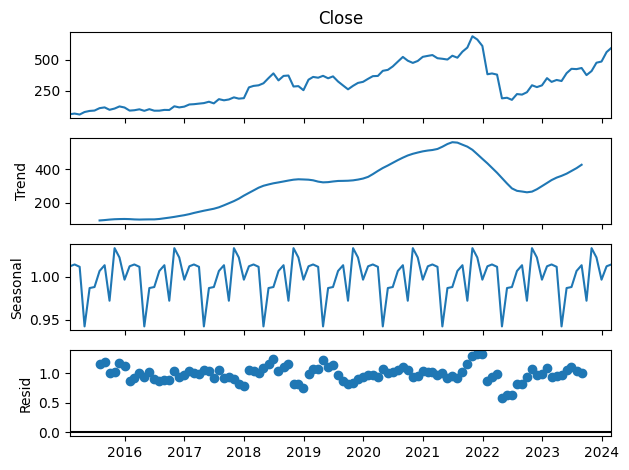

In [ ]:
# Decompose the stock price to its components:
# Stock price= Trend+Seasonal+Error
series_close=dfs['Close']
series_close.index=pd.to_datetime(series_close.index)
# Correct the starting and final dates of stock price (dfs.head(1) and dfs.tail(1))
idx=pd.date_range('2015-01-02 00:00:00+00:00','2024-03-07 00:00:00+00:00',freq='M') # update the end date as equal to dfs.tail(1) defined above
series_close=series_close.reindex(idx,method='pad')
series_close=series_close.astype('float32')
series_close.shape
decomposed = seasonal_decompose(series_close,model='multiplicative')
fig = decomposed.plot()

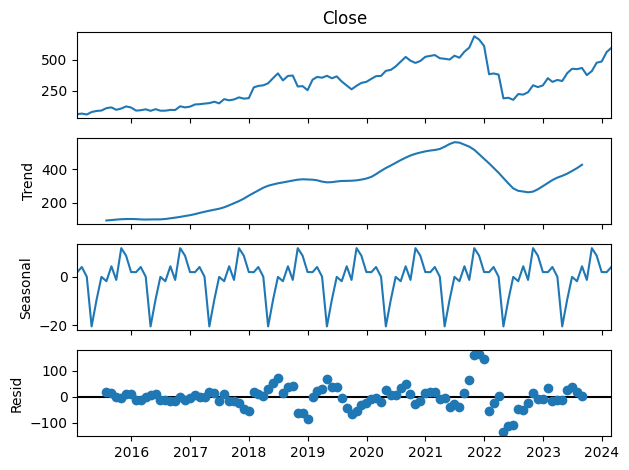

In [ ]:
decomposed1 = seasonal_decompose(series_close,model='addictive') # can also try addictive method
fig = decomposed1.plot() # and plot it

<Axes: title={'center': 'Closing Prices Trend of Stock'}>

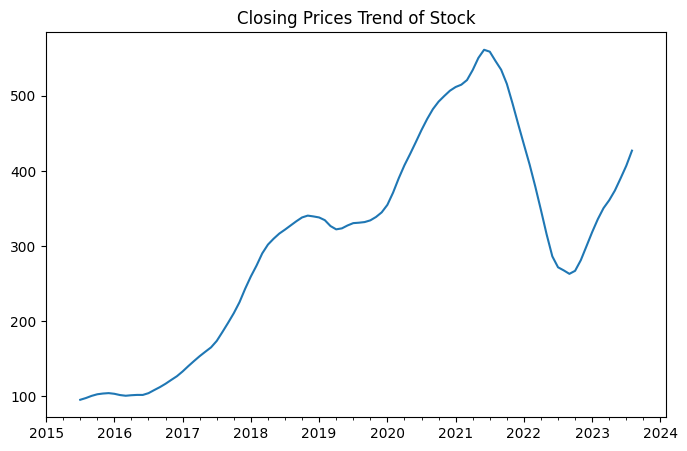

In [ ]:
#Question 9:  Plot Trend component of stock data and explain the your findings
decomposed.trend.plot(figsize=(8,5),title='Closing Prices Trend of Stock')



## Question 9
The closing price of the stock saw a gradual rise from 2015, with a notable increase around 2018. This can be attributed to Netflix's pioneering success in the streaming secor through its early investment in original content, which greately paid off under its 'content is king' strategy. From 2018 to 2020, the stock price continued to trend upwards, though the pace of growth slowed compared to the previous surge. Despite this, the company maintained growth, likely due to the contributed poppularity and expansion of its original content libreary. The end of 2020 to the beginning of 2021 saw a significant rise in the stock's opening price, peaking during this period. This can be linked to the COVID-19 pandemic, which led to a surge in demand for streaming services as many people began working and entertaining from home. However, from late 2021 to early 2022, the stock experienced a sharp decline, falling from its peak to a much lower price. The ralaxation of COVID-19 restrictions in Western countries and the influx of major players into the content-driven streaming industry exerted pressure on Netflix, leading to subscriber and revenue growth that fell short of expectation.

<Axes: title={'center': 'Seasonality of Opening Prices of Stock'}>

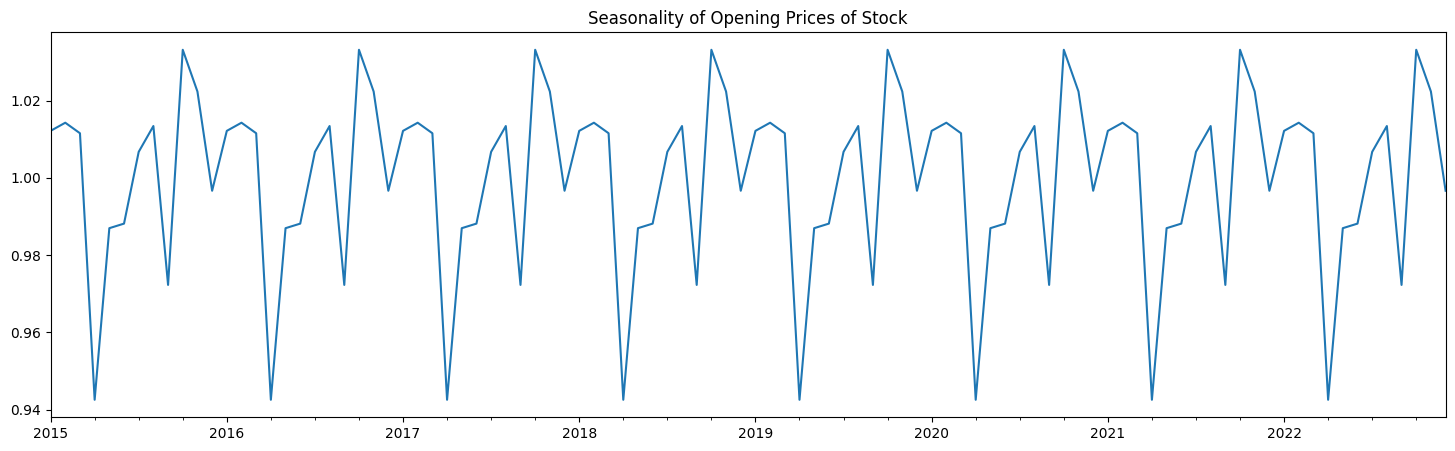

In [ ]:
# Question 10: Plot Seasonality component of stock data and explain the your findings
decomposed.seasonal[:96].plot(figsize=(18,5),title='Seasonality of Opening Prices of Stock')



## Question 10
The stock price exhibits clear periodic fluctuations, which could be indicative of seasonal characteristics in the company's performance or stock behavior. These seasonal fluctuations appear more pronounced during certain times of the year, which may correlate with specific marketing initiatives, content releases, or consumer consumption patterns of Netflix. For example, Netflix typically releases a slate of highly anticipated original content during the winner holiday season to capture more viewers when they are likely to have leisure time, this could result in seasonal spikes in the stock price annually around that time.

### Splitting the dataframe to make training dataset

Extracing Close from the previous dataframe and load to other and discarding date.

In [ ]:
#Extracing Close from the dataframe and discarding date.
df = dfs.iloc[:,1:]
df.head(5)

,Close
Date,
2015-01-02 00:00:00-05:00,49.848572
2015-01-05 00:00:00-05:00,47.311428
2015-01-06 00:00:00-05:00,46.501431
2015-01-07 00:00:00-05:00,46.742859
2015-01-08 00:00:00-05:00,47.779999


In [ ]:
# For the LSTM Model Splitting the dataframe to make training dataset.
# Use 80% of data as training data

PercentageIntrainingData=0.8

training_set = df.iloc[:round(len(df)*PercentageIntrainingData)].values

In [ ]:
# Scale data to the range (0,1)
#Question 11: Why we should scale data? How the MinMaxScaler function works?

scaler = MinMaxScaler(feature_range=(0, 1))
training_set = scaler.fit_transform(training_set)



## Question 11
Data scaling ensures that the network learns different features within a unified value range, which is particularly important when training models with gradient descent methods. Data scaling facilitates faster and more effective convergence and helps prevent gradient vanishing or activation function saturation, which can occur when data is unscaled or spans a wide range.

The MinMaxScaler function works by identifying the minimum and maximum values for each feature and then scales those feature values to a range between 0 and 1. This scaling method ensures all values are on a uniform scale, helping the model learn the data features more effectively and improving the efficiency of the training process.

In [ ]:
### Select number of days we want to predict into the future and number of past days we want to use to predict the future

in_future = 10 # Number of days we want to predict into the future
in_past = 120 # Number of past days we want to use to predict the future # what if change the number of days

# Here, we are going to make such arrangement with the training dataset that previous 120 Days will be used to predict the next 10 days.

trainX = []
trainY = []



for i in range(in_past, len(training_set) - in_future +1):
    trainX.append(training_set[i - in_past:i, 0:training_set.shape[1]])
    trainY.append(training_set[i + in_future - 1:i + in_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape = {}.'.format(trainX.shape))
print('trainY shape = {}.'.format(trainY.shape))

trainX shape = (1724, 120, 1).
trainY shape = (1724, 1).


In [ ]:
tscv = TimeSeriesSplit(n_splits = 4)

In [ ]:
# Perform time series cross-validation
for train_index, val_index in tscv.split(trainX):
    X_train, X_val = trainX[train_index], trainX[val_index]
    y_train, y_val = trainY[train_index], trainY[val_index]

## LSTM Model

### Preparing Keras Model.

In [ ]:
model = Sequential()
#model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
model.summary()

#Question 12: Explain the structure of above deel plearning model. Explain the LSTM model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 81001 (316.41 KB)
Trainable params: 81001 

## Question 12
The deep learning model is a Sequential model.

The first row is a long short term memory layer with 50 input neurons, the input shape comes from the trainX shape, it has a return_sequences=True to return the entire output sequence after processing.

The second row is another LSTM layer with 100 neurons, as the first layer, it has a ReLU activation function for non-linearity, it has the return_sequences=False which output is only the final vector which feeds the next dense layer that has 100 neurons and relu activation.

Between the dense layer there are dropout layers of 20% of neuorns each to prevent overfitting.

The output layer is a Dense layer and has 1 neuron.

Finally, to compile the model, the adam optimizer is used with a mse loss function which is used because this is a regression problem, accuracy is also used for exploratory reasons.

### Fitting the Model to the training dataset

In [ ]:
# train model on full train set, with 80/20 CV split
### not history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.2, verbose=1)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data= (X_val, y_val), verbose=1)

Epoch 1/20
44/44 [==============================] - 12s 210ms/step - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 2/20
44/44 [==============================] - 5s 123ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 3/20
44/44 [==============================] - 6s 143ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 4/20
44/44 [==============================] - 5s 122ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 5/20
44/44 [==============================] - 6s 145ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6/20
44/44 [==============================] - 5s 124ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 7/20
44/44 [=========

### Ploting the accuracy and valid accuracy so as to observe the learning of the Model.


Mean_loss: 0.46%

Mean_val_loss: 0.90%


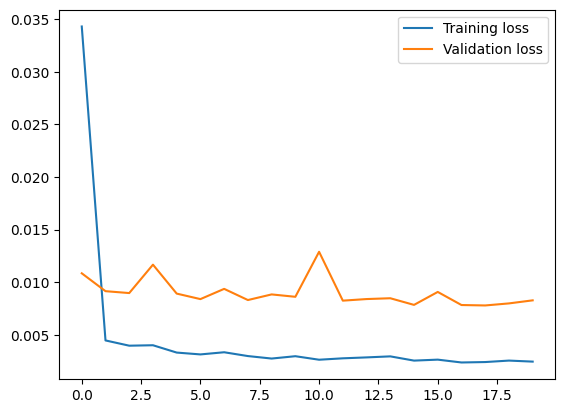

In [ ]:
Mean_loss = np.mean(history.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss*100))
Mean_val_loss= np.mean(history.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss*100))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

#Question 13: Explain the accuracy plots for training and validation sets



It seems that the model is learning quite well.
And the overfitting is not present in our model.

## Question 13
We can find out that at the first two epochs, the loss on training set decreses dramatically, while the loss on validation set keeps being small from the start. After 2 epochs, both sets' loss starts to stagnate although the loss on validation emerges volatility during 5 to 8 epochs, but when epochs are larger than 10, both loss functions are stable and parallel with little change. We can say that there is less possibility that the model is overfitting.

### Create test dataset and Prediction

In [ ]:
test_data =df.iloc[round(len(df)*PercentageIntrainingData):,:].values
scaler = MinMaxScaler(feature_range=(0, 1))
test_data = scaler.fit_transform(test_data)

prediction_stocks = []

for i in range(in_past, len(test_data)-in_future+1):
    prediction_stocks.append(test_data[i-in_past:i])

prediction_stocks = np.array(prediction_stocks)
print(prediction_stocks.shape)
#Now we are going to feed in the prediction dataset to the model.
predictions = model.predict(prediction_stocks)

(334, 120, 1)
11/11 [==============================] - 1s 34ms/step


In [ ]:
# The predicted data need's to be invert transformed so that the values returns into the original scale.
y_pred_future = scaler.inverse_transform(predictions)
#Taking these predicted data and making it into dataframe so that it can be interpret.
df_forecast = pd.DataFrame({'Date':dfs.Date[-y_pred_future.shape[0]:],'Close':y_pred_future[:,0]})
df_forecast.head(3)

,Date,Close
Date,,
2022-11-15 00:00:00-05:00,2022-11-15 00:00:00-05:00,287.855621
2022-11-16 00:00:00-05:00,2022-11-16 00:00:00-05:00,291.175934
2022-11-17 00:00:00-05:00,2022-11-17 00:00:00-05:00,292.702606


In [ ]:
# Ploting the predicted 'Close' Stock Price with Original 'Close' Stock Price.
#
import plotly.graph_objs as go

fig2=go.Figure(data=[go.Scatter(name = 'Close',x= dfs['Date'],y= dfs['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast['Date'],y= df_forecast['Close'])])
fig2.show()

In [ ]:
# #Question 14:  Calculate the residual and plot time series of residuals and explain your findings
actual=df.iloc[-y_pred_future.shape[0]:,:].values.flatten()
forecast=np.array(df_forecast['Close'])
residual=actual-forecast
Residual=pd.DataFrame({'Date': dfs.Date[-y_pred_future.shape[0]:], 'Residual': residual})
fig3=go.Figure(data=[go.Scatter(name = 'Close',x= Residual['Date'],y= Residual['Residual'])])
fig3.show()

## Question 14
From the graph we can find out that before Nov 2023, the residual fluctuates generally within the interval of (-60, 60) and approximately keeps an average value at 0. But after Nov 2023, the residual keeps being larger than 0 and it breaks the margin of 100 during a short period. This means there are some problems with the data or the model as normally the residual is expected to fluctuate around 0. We can exclude the possibility of overfitting as shown in the loss function graph. Compare to the previous graph, when the actual data kepps increasing for a long period, the predictions seems to underrate the level of this increase at it could correctly fit the trend but the overall level is one step behind. The drift of data could lead to this problem as we choose to predict the price of the 10th day in the future. To fix this problem, we would compare it with predicting the first day in the future.

Extracing High, Low, Close from the previous dataframe and load to other and discarding date, while fit and predict the same model.

trainX1 shape = (1724, 120, 3).
trainY1 shape = (1724, 1).
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 120, 50)           10800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                             

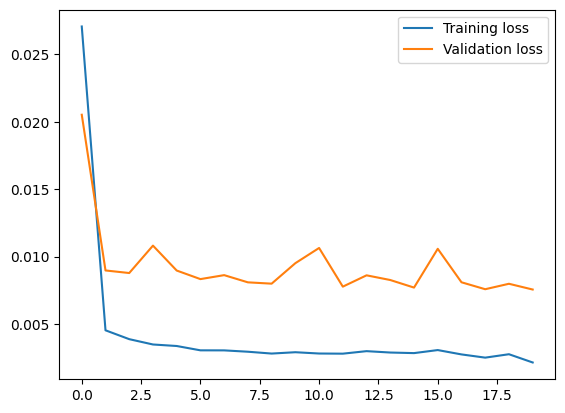

In [ ]:
# Extracing High, Low, Close from the dataframe and discarding date.
data1=data_s[['High','Low','Close','Date']]
df1=data1.loc[data1['Date']>'2015']
df1=df1[['High','Low','Close']]

# Spliptting dataset and scale data.
training_set1=df1.iloc[:round(len(df1)*PercentageIntrainingData)].values
training_set1 = scaler.fit_transform(training_set1)

# Here, we are going to make such arrangement with the training dataset that previous 120 Days will be used to predict the next 10 days.

trainX1 = []
trainY1 = []

for i in range(in_past, len(training_set1) - in_future +1):
    trainX1.append(training_set1[i - in_past:i, :])
    trainY1.append(training_set1[i + in_future - 1:i + in_future, -1])

trainX1, trainY1 = np.array(trainX1), np.array(trainY1)

print('trainX1 shape = {}.'.format(trainX1.shape))
print('trainY1 shape = {}.'.format(trainY1.shape))

# Perform time series cross-validation
for train_index, val_index in tscv.split(trainX1):
    X_train1, X_val1 = trainX1[train_index], trainX1[val_index]
    y_train1, y_val1 = trainY1[train_index], trainY1[val_index]

# Preparing Keras model
model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(trainX1.shape[1], trainX1.shape[2]), return_sequences=True))
model1.add(LSTM(100, activation='relu', return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
model1.summary()

# train model on full train set, with 80/20 CV split
history1 = model1.fit(X_train1, y_train1, epochs=20, batch_size=32, validation_data= (X_val1, y_val1), verbose=1)

# Ploting the loss function and valid set loss function
Mean_loss1 = np.mean(history1.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss1*100))
Mean_val_loss1= np.mean(history1.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss1*100))

plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.legend();

If we want to predict one day in the future.

trainX2 shape = (1733, 120, 1).
trainY2 shape = (1733, 1).
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 120, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                             

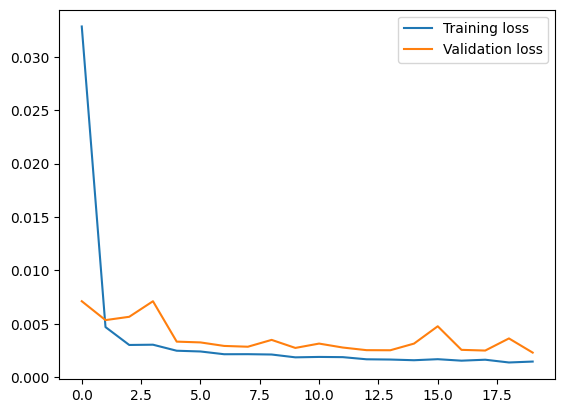

In [ ]:
# Transforming data
training_set2 = df.iloc[:round(len(df)*PercentageIntrainingData)].values
scaler1 = MinMaxScaler(feature_range=(0, 1))
training_set2 = scaler1.fit_transform(training_set2)

### Select number of days we want to predict into the future and number of past days we want to use to predict the future

in_future1 = 1 # Number of days we want to predict into the future
in_past = 120 # Number of past days we want to use to predict the future

# Here, we are going to make such arrangement with the training dataset that previous 120 Days will be used to predict the next 10 days.

trainX2 = []
trainY2 = []



for i in range(in_past, len(training_set2) - in_future1 +1):
    trainX2.append(training_set2[i - in_past:i, 0:training_set2.shape[1]])
    trainY2.append(training_set2[i + in_future1 - 1:i + in_future1, 0])

trainX2, trainY2 = np.array(trainX2), np.array(trainY2)

print('trainX2 shape = {}.'.format(trainX2.shape))
print('trainY2 shape = {}.'.format(trainY2.shape))

# Perform time series cross-validation
for train_index, val_index in tscv.split(trainX2):
    X_train2, X_val2 = trainX2[train_index], trainX2[val_index]
    y_train2, y_val2 = trainY2[train_index], trainY2[val_index]

model2 = Sequential()
model2.add(LSTM(50, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model2.add(LSTM(100, activation='relu', return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
model2.summary()


# train model on full train set, with 80/20 CV split
history2 = model2.fit(X_train2, y_train2, epochs=20, batch_size=32, validation_data= (X_val2, y_val2), verbose=1)

# Ploting the loss function and valid set loss function
Mean_loss2 = np.mean(history2.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss2*100))
Mean_val_loss2= np.mean(history2.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss2*100))

plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.legend();

# Create test dataset and prediction

prediction_stocks2 = []

for i in range(in_past, len(test_data)-in_future1+1):
    prediction_stocks2.append(test_data[i-in_past:i])

prediction_stocks2 = np.array(prediction_stocks2)
prediction_stocks2.shape

#Now we are going to feed in the prediction dataset to the model.
predictions2 = model2.predict(prediction_stocks2)
predictions2.shape

# Taking these predicted data and making it into dataframe so that it can be interpret.
y_pred_future2 = scaler1.inverse_transform(predictions2)

# Taking these predicted data and making it into dataframe so that it can be interpret.
df_forecast2 = pd.DataFrame({'Date':dfs.Date[-y_pred_future2.shape[0]:],'Close':y_pred_future2[:,0]})
df_forecast2.tail(3)

# Ploting the predicted 'Close' Stock Price with Original 'Close' Stock Price.

fig4=go.Figure(data=[go.Scatter(name = 'Close',x= dfs['Date'],y= dfs['Close']),
                   go.Scatter(name = 'Close_Predicted',x= df_forecast2['Date'],y= df_forecast2['Close'])])
fig4.show()

# Calculate the residual and plot time series of residuals and explain your findings
actual1=df.iloc[-y_pred_future2.shape[0]:,:].values.flatten()
forecast1=np.array(df_forecast2['Close'])
residual1=actual1-forecast1
Residual1=pd.DataFrame({'Date': dfs.Date[-y_pred_future2.shape[0]:], 'Residual': residual1})
fig5=go.Figure(data=[go.Scatter(name = 'Close',x= Residual1['Date'],y= Residual1['Residual'])])
fig5.show()

### Create Deep learning model
For this task, You must keep the model architecture pretty simple.
The following function allows to parameterise the choice of hyperparameters in the deep learning. It will come in super handy when we move onto tuning our parameters later.

In [ ]:
def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=[1], init='uniform', nbr_features=trainX.shape[0], dense_nparams=3):
    model = Sequential()
    model.add(LSTM(dense_nparams, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(dense_nparams, activation='relu', return_sequences=False))
    model.add(Dropout(dropout))

    for i in range(1,len(dense_layer_sizes)):
        model.add(Dense(dense_layer_sizes[i], activation=act))
        model.add(Dropout(dropout) )

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer,metrics=["mse"])
    return model

In [ ]:
##Question 15:  Explain briefly create_model function, (why we need this function?, inputs, output, how it works?)

## Question 15
The function name is create_model. The structure of this function is the process of building a deep learning keras model with LSTM layers and Dense layers that take the input_shape of (trainX.shape[1], trainX.shape[2]). or (120, 1) and with 1 output layer. It also specify the parameter of compiling model. The structure is simple to prepare futher grid search in the following contents to enchance model performance. It is used as the built in function is the KerasRegressor for establishing grid search estimator model.

The inputs include optimizer, dropout (dropout rate), act (activation function), dense layer sizes, init (initializer), number of features and dense_nparams for number of neurons in LSTM layers with their default value of 'adam', 0.1, 'relu', [1], 'uniform', trainX.shape[0] and 3 respectively. The output of this function is the compiled keras model object.

The function first create an empty sequential model. Then add two LSTM layers with specified parameters. Then add a dropout layer to drop out some of the neurons. Then the function includes a for loop to iterate every element in the dense_layer_sizes as parameter to number of neurons of Dense layers. Then add a dropout layer to drop out some of the neurons to avoid overfitting. Finally it adds an output layer with one neuron. Then the function compiles the model with some parameters and it returns the compiled model. If not speciying the inputs, the function will take default values as inputs.

##  Grid search
###  batch size and epochs
We can see from the graph above that we might be training our network for too long. Let's use **grid search** to find out what the optimal values for `batch_size` and `epochs` are.

 **Please note, you will obtian the best structure for each specification of the model, you should use the best parameter for the nest step**

In [ ]:
##Question 16:  Explain briefly the batch_size and epochs and why we should find optimum value of them?



In [ ]:
# create model
model = KerasRegressor(build_fn=create_model, verbose=1)

#def create_model(optimizer='adam', dropout=0.1,act='relu',dense_layer_sizes=1, init='uniform', nbr_features=trainX.shape[0], dense_nparams=[3]):

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
# search the grid
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
### updates
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv,  verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(trainX, trainY)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
19/19 [==============================] - 4s 67ms/step - loss: 0.0064 - mse: 0.0064
Epoch 2/50
19/19 [==============================] - 2s 100ms/step - loss: 0.0035 - mse: 0.0035
Epoch 3/50
19/19 [==============================] - 1s 61ms/step - loss: 0.0016 - mse: 0.0016
Epoch 4/50
19/19 [==============================] - 1s 56ms/step - loss: 7.1686e-04 - mse: 7.1686e-04
Epoch 5/50
19/19 [==============================] - 1s 56ms/step - loss: 4.0256e-04 - mse: 4.0256e-04
Epoch 6/50
19/19 [==============================] - 1s 56ms/step - loss: 3.0727e-04 - mse: 3.0727e-04
Epoch 7/50
19/19 [==============================] - 1s 57ms/step - loss: 3.3192e-04 - mse: 3.3192e-04
Epoch 8/50
19/19 [==============================] - 1s 56ms/step - loss: 3.2457e-04 - mse: 3.2457e-04
Epoch 9/50
19/19 [==============================] - 1s 56ms/step - loss: 3.4296e-04 - mse: 3.4296e-04
Epoch 10/50
19/19 [==============================] - 1s 57ms/step - loss: 3.1311e-04 - mse: 3.1311e-04
Ep

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
37/37 [==============================] - 6s 78ms/step - loss: 0.0149 - mse: 0.0149
Epoch 2/50
37/37 [==============================] - 2s 64ms/step - loss: 0.0074 - mse: 0.0074
Epoch 3/50
37/37 [==============================] - 2s 56ms/step - loss: 0.0043 - mse: 0.0043
Epoch 4/50
37/37 [==============================] - 2s 56ms/step - loss: 0.0029 - mse: 0.0029
Epoch 5/50
37/37 [==============================] - 2s 56ms/step - loss: 0.0023 - mse: 0.0023
Epoch 6/50
37/37 [==============================] - 2s 56ms/step - loss: 0.0021 - mse: 0.0021
Epoch 7/50
37/37 [==============================] - 3s 87ms/step - loss: 0.0021 - mse: 0.0021
Epoch 8/50
37/37 [==============================] - 2s 56ms/step - loss: 0.0021 - mse: 0.0021
Epoch 9/50
37/37 [==============================] - 2s 56ms/step - loss: 0.0021 - mse: 0.0021
Epoch 10/50
37/37 [==============================] - 2s 56ms/step - loss: 0.0021 - mse: 0.0021
Epoch 11/50
37/37 [==============================] - 2s 56m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
54/54 [==============================] - 6s 56ms/step - loss: 0.0405 - mse: 0.0405
Epoch 2/50
54/54 [==============================] - 3s 55ms/step - loss: 0.0139 - mse: 0.0139
Epoch 3/50
54/54 [==============================] - 4s 69ms/step - loss: 0.0075 - mse: 0.0075
Epoch 4/50
54/54 [==============================] - 3s 63ms/step - loss: 0.0070 - mse: 0.0070
Epoch 5/50
54/54 [==============================] - 3s 56ms/step - loss: 0.0059 - mse: 0.0059
Epoch 6/50
54/54 [==============================] - 3s 55ms/step - loss: 0.0064 - mse: 0.0064
Epoch 7/50
54/54 [==============================] - 4s 78ms/step - loss: 0.0060 - mse: 0.0060
Epoch 8/50
54/54 [==============================] - 3s 56ms/step - loss: 0.0059 - mse: 0.0059
Epoch 9/50
54/54 [==============================] - 4s 65ms/step - loss: 0.0047 - mse: 0.0047
Epoch 10/50
54/54 [==============================] - 3s 56ms/step - loss: 0.0063 - mse: 0.0063
Epoch 11/50
54/54 [==============================] - 4s 77m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
72/72 [==============================] - 8s 72ms/step - loss: 0.0811 - mse: 0.0811
Epoch 2/50
72/72 [==============================] - 4s 55ms/step - loss: 0.0557 - mse: 0.0557
Epoch 3/50
72/72 [==============================] - 4s 55ms/step - loss: 0.0405 - mse: 0.0405
Epoch 4/50
72/72 [==============================] - 5s 71ms/step - loss: 0.0324 - mse: 0.0324
Epoch 5/50
72/72 [==============================] - 4s 55ms/step - loss: 0.0285 - mse: 0.0285
Epoch 6/50
72/72 [==============================] - 4s 56ms/step - loss: 0.0270 - mse: 0.0270
Epoch 7/50
72/72 [==============================] - 5s 72ms/step - loss: 0.0263 - mse: 0.0263
Epoch 8/50
72/72 [==============================] - 4s 55ms/step - loss: 0.0261 - mse: 0.0261
Epoch 9/50
72/72 [==============================] - 4s 62ms/step - loss: 0.0261 - mse: 0.0261
Epoch 10/50
72/72 [==============================] - 5s 65ms/step - loss: 0.0261 - mse: 0.0261
Epoch 11/50
72/72 [==============================] - 4s 56m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
90/90 [==============================] - 8s 56ms/step - loss: 0.0937 - mse: 0.0937
Epoch 2/50
90/90 [==============================] - 6s 67ms/step - loss: 0.0298 - mse: 0.0298
Epoch 3/50
90/90 [==============================] - 5s 57ms/step - loss: 0.0196 - mse: 0.0196
Epoch 4/50
90/90 [==============================] - 5s 55ms/step - loss: 0.0135 - mse: 0.0135
Epoch 5/50
90/90 [==============================] - 6s 67ms/step - loss: 0.0167 - mse: 0.0167
Epoch 6/50
90/90 [==============================] - 5s 55ms/step - loss: 0.0153 - mse: 0.0153
Epoch 7/50
90/90 [==============================] - 6s 68ms/step - loss: 0.0131 - mse: 0.0131
Epoch 8/50
90/90 [==============================] - 5s 56ms/step - loss: 0.0112 - mse: 0.0112
Epoch 9/50
90/90 [==============================] - 6s 68ms/step - loss: 0.0117 - mse: 0.0117
Epoch 10/50
90/90 [==============================] - 5s 55ms/step - loss: 0.0109 - mse: 0.0109
Epoch 11/50
90/90 [==============================] - 5s 57m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
19/19 [==============================] - 4s 56ms/step - loss: 0.0067 - mse: 0.0067
Epoch 2/100
19/19 [==============================] - 1s 56ms/step - loss: 0.0041 - mse: 0.0041
Epoch 3/100
19/19 [==============================] - 1s 56ms/step - loss: 0.0024 - mse: 0.0024
Epoch 4/100
19/19 [==============================] - 1s 57ms/step - loss: 0.0013 - mse: 0.0013
Epoch 5/100
19/19 [==============================] - 1s 56ms/step - loss: 7.5072e-04 - mse: 7.5072e-04
Epoch 6/100
19/19 [==============================] - 1s 56ms/step - loss: 4.6910e-04 - mse: 4.6910e-04
Epoch 7/100
19/19 [==============================] - 1s 67ms/step - loss: 3.4942e-04 - mse: 3.4942e-04
Epoch 8/100
19/19 [==============================] - 2s 100ms/step - loss: 3.0370e-04 - mse: 3.0370e-04
Epoch 9/100
19/19 [==============================] - 1s 61ms/step - loss: 2.8987e-04 - mse: 2.8987e-04
Epoch 10/100
19/19 [==============================] - 1s 56ms/step - loss: 2.8618e-04 - mse: 2.8618e-04


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
37/37 [==============================] - 5s 59ms/step - loss: 0.0034 - mse: 0.0034
Epoch 2/100
37/37 [==============================] - 2s 56ms/step - loss: 0.0017 - mse: 0.0017
Epoch 3/100
37/37 [==============================] - 2s 56ms/step - loss: 0.0014 - mse: 0.0014
Epoch 4/100
37/37 [==============================] - 2s 56ms/step - loss: 9.7768e-04 - mse: 9.7768e-04
Epoch 5/100
37/37 [==============================] - 2s 59ms/step - loss: 0.0011 - mse: 0.0011
Epoch 6/100
37/37 [==============================] - 3s 83ms/step - loss: 7.3513e-04 - mse: 7.3513e-04
Epoch 7/100
37/37 [==============================] - 2s 56ms/step - loss: 6.6438e-04 - mse: 6.6438e-04
Epoch 8/100
37/37 [==============================] - 2s 56ms/step - loss: 7.4013e-04 - mse: 7.4013e-04
Epoch 9/100
37/37 [==============================] - 2s 56ms/step - loss: 7.1302e-04 - mse: 7.1302e-04
Epoch 10/100
37/37 [==============================] - 2s 56ms/step - loss: 4.5114e-04 - mse: 4.5114e-04
E

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
54/54 [==============================] - 6s 57ms/step - loss: 0.0590 - mse: 0.0590
Epoch 2/100
54/54 [==============================] - 4s 74ms/step - loss: 0.0412 - mse: 0.0412
Epoch 3/100
54/54 [==============================] - 3s 62ms/step - loss: 0.0316 - mse: 0.0316
Epoch 4/100
54/54 [==============================] - 3s 57ms/step - loss: 0.0263 - mse: 0.0263
Epoch 5/100
54/54 [==============================] - 3s 57ms/step - loss: 0.0235 - mse: 0.0235
Epoch 6/100
54/54 [==============================] - 4s 79ms/step - loss: 0.0222 - mse: 0.0222
Epoch 7/100
54/54 [==============================] - 3s 57ms/step - loss: 0.0216 - mse: 0.0216
Epoch 8/100
54/54 [==============================] - 3s 57ms/step - loss: 0.0214 - mse: 0.0214
Epoch 9/100
54/54 [==============================] - 3s 58ms/step - loss: 0.0214 - mse: 0.0214
Epoch 10/100
54/54 [==============================] - 4s 78ms/step - loss: 0.0214 - mse: 0.0214
Epoch 11/100
54/54 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
72/72 [==============================] - 7s 63ms/step - loss: 0.0281 - mse: 0.0281
Epoch 2/100
72/72 [==============================] - 4s 56ms/step - loss: 0.0117 - mse: 0.0117
Epoch 3/100
72/72 [==============================] - 5s 72ms/step - loss: 0.0089 - mse: 0.0089
Epoch 4/100
72/72 [==============================] - 4s 56ms/step - loss: 0.0061 - mse: 0.0061
Epoch 5/100
72/72 [==============================] - 4s 56ms/step - loss: 0.0055 - mse: 0.0055
Epoch 6/100
72/72 [==============================] - 5s 72ms/step - loss: 0.0053 - mse: 0.0053
Epoch 7/100
72/72 [==============================] - 4s 56ms/step - loss: 0.0049 - mse: 0.0049
Epoch 8/100
72/72 [==============================] - 4s 56ms/step - loss: 0.0042 - mse: 0.0042
Epoch 9/100
72/72 [==============================] - 5s 72ms/step - loss: 0.0040 - mse: 0.0040
Epoch 10/100
72/72 [==============================] - 4s 56ms/step - loss: 0.0034 - mse: 0.0034
Epoch 11/100
72/72 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
90/90 [==============================] - 8s 57ms/step - loss: 0.1706 - mse: 0.1706
Epoch 2/100
90/90 [==============================] - 6s 69ms/step - loss: 0.1009 - mse: 0.1009
Epoch 3/100
90/90 [==============================] - 5s 57ms/step - loss: 0.0752 - mse: 0.0752
Epoch 4/100
90/90 [==============================] - 6s 68ms/step - loss: 0.0607 - mse: 0.0607
Epoch 5/100
90/90 [==============================] - 5s 56ms/step - loss: 0.0530 - mse: 0.0530
Epoch 6/100
90/90 [==============================] - 6s 69ms/step - loss: 0.0494 - mse: 0.0494
Epoch 7/100
90/90 [==============================] - 5s 56ms/step - loss: 0.0478 - mse: 0.0478
Epoch 8/100
90/90 [==============================] - 5s 61ms/step - loss: 0.0473 - mse: 0.0473
Epoch 9/100
90/90 [==============================] - 6s 63ms/step - loss: 0.0471 - mse: 0.0471
Epoch 10/100
90/90 [==============================] - 5s 56ms/step - loss: 0.0470 - mse: 0.0470
Epoch 11/100
90/90 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
10/10 [==============================] - 4s 60ms/step - loss: 0.0074 - mse: 0.0074
Epoch 2/50
10/10 [==============================] - 1s 58ms/step - loss: 0.0059 - mse: 0.0059
Epoch 3/50
10/10 [==============================] - 1s 59ms/step - loss: 0.0045 - mse: 0.0045
Epoch 4/50
10/10 [==============================] - 1s 58ms/step - loss: 0.0034 - mse: 0.0034
Epoch 5/50
10/10 [==============================] - 1s 59ms/step - loss: 0.0026 - mse: 0.0026
Epoch 6/50
10/10 [==============================] - 1s 62ms/step - loss: 0.0019 - mse: 0.0019
Epoch 7/50
10/10 [==============================] - 1s 58ms/step - loss: 0.0014 - mse: 0.0014
Epoch 8/50
10/10 [==============================] - 1s 59ms/step - loss: 0.0010 - mse: 0.0010
Epoch 9/50
10/10 [==============================] - 1s 58ms/step - loss: 7.4964e-04 - mse: 7.4964e-04
Epoch 10/50
10/10 [==============================] - 1s 57ms/step - loss: 5.7522e-04 - mse: 5.7522e-04
Epoch 11/50
10/10 [========================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
19/19 [==============================] - 5s 90ms/step - loss: 0.0149 - mse: 0.0149
Epoch 2/50
19/19 [==============================] - 1s 58ms/step - loss: 0.0110 - mse: 0.0110
Epoch 3/50
19/19 [==============================] - 1s 58ms/step - loss: 0.0082 - mse: 0.0082
Epoch 4/50
19/19 [==============================] - 1s 58ms/step - loss: 0.0061 - mse: 0.0061
Epoch 5/50
19/19 [==============================] - 1s 58ms/step - loss: 0.0046 - mse: 0.0046
Epoch 6/50
19/19 [==============================] - 1s 57ms/step - loss: 0.0036 - mse: 0.0036
Epoch 7/50
19/19 [==============================] - 1s 58ms/step - loss: 0.0029 - mse: 0.0029
Epoch 8/50
19/19 [==============================] - 1s 58ms/step - loss: 0.0025 - mse: 0.0025
Epoch 9/50
19/19 [==============================] - 1s 58ms/step - loss: 0.0023 - mse: 0.0023
Epoch 10/50
19/19 [==============================] - 1s 66ms/step - loss: 0.0022 - mse: 0.0022
Epoch 11/50
19/19 [==============================] - 2s 99m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
27/27 [==============================] - 5s 58ms/step - loss: 0.0134 - mse: 0.0134
Epoch 2/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0101 - mse: 0.0101
Epoch 3/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0066 - mse: 0.0066
Epoch 4/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0064 - mse: 0.0064
Epoch 5/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0063 - mse: 0.0063
Epoch 6/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0044 - mse: 0.0044
Epoch 7/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0050 - mse: 0.0050
Epoch 8/50
27/27 [==============================] - 2s 70ms/step - loss: 0.0045 - mse: 0.0045
Epoch 9/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0046 - mse: 0.0046
Epoch 10/50
27/27 [==============================] - 2s 57ms/step - loss: 0.0042 - mse: 0.0042
Epoch 11/50
27/27 [==============================] - 2s 57m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
36/36 [==============================] - 6s 61ms/step - loss: 0.0852 - mse: 0.0852
Epoch 2/50
36/36 [==============================] - 2s 61ms/step - loss: 6272.6582 - mse: 6272.6582
Epoch 3/50
36/36 [==============================] - 2s 61ms/step - loss: 0.0373 - mse: 0.0373
Epoch 4/50
36/36 [==============================] - 2s 61ms/step - loss: 0.0387 - mse: 0.0387
Epoch 5/50
36/36 [==============================] - 3s 89ms/step - loss: 0.0387 - mse: 0.0387
Epoch 6/50
36/36 [==============================] - 2s 61ms/step - loss: 0.0390 - mse: 0.0390
Epoch 7/50
36/36 [==============================] - 2s 61ms/step - loss: 0.0385 - mse: 0.0385
Epoch 8/50
36/36 [==============================] - 2s 61ms/step - loss: 0.0375 - mse: 0.0375
Epoch 9/50
36/36 [==============================] - 2s 61ms/step - loss: 0.0377 - mse: 0.0377
Epoch 10/50
36/36 [==============================] - 3s 92ms/step - loss: 0.0375 - mse: 0.0375
Epoch 11/50
36/36 [==============================] - 

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
45/45 [==============================] - 6s 62ms/step - loss: 0.1646 - mse: 0.1646
Epoch 2/50
45/45 [==============================] - 3s 58ms/step - loss: 0.1266 - mse: 0.1266
Epoch 3/50
45/45 [==============================] - 3s 59ms/step - loss: 0.1061 - mse: 0.1061
Epoch 4/50
45/45 [==============================] - 3s 63ms/step - loss: 0.0900 - mse: 0.0900
Epoch 5/50
45/45 [==============================] - 4s 78ms/step - loss: 0.0775 - mse: 0.0775
Epoch 6/50
45/45 [==============================] - 3s 59ms/step - loss: 0.0681 - mse: 0.0681
Epoch 7/50
45/45 [==============================] - 3s 60ms/step - loss: 0.0612 - mse: 0.0612
Epoch 8/50
45/45 [==============================] - 3s 58ms/step - loss: 0.0563 - mse: 0.0563
Epoch 9/50
45/45 [==============================] - 4s 84ms/step - loss: 0.0529 - mse: 0.0529
Epoch 10/50
45/45 [==============================] - 3s 59ms/step - loss: 0.0507 - mse: 0.0507
Epoch 11/50
45/45 [==============================] - 3s 59m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
10/10 [==============================] - 3s 59ms/step - loss: 0.0070 - mse: 0.0070
Epoch 2/100
10/10 [==============================] - 1s 59ms/step - loss: 0.0051 - mse: 0.0051
Epoch 3/100
10/10 [==============================] - 1s 75ms/step - loss: 0.0034 - mse: 0.0034
Epoch 4/100
10/10 [==============================] - 1s 100ms/step - loss: 0.0021 - mse: 0.0021
Epoch 5/100
10/10 [==============================] - 1s 102ms/step - loss: 0.0012 - mse: 0.0012
Epoch 6/100
10/10 [==============================] - 1s 67ms/step - loss: 5.8288e-04 - mse: 5.8288e-04
Epoch 7/100
10/10 [==============================] - 1s 59ms/step - loss: 5.0969e-04 - mse: 5.0969e-04
Epoch 8/100
10/10 [==============================] - 1s 58ms/step - loss: 4.4791e-04 - mse: 4.4791e-04
Epoch 9/100
10/10 [==============================] - 1s 60ms/step - loss: 3.8563e-04 - mse: 3.8563e-04
Epoch 10/100
10/10 [==============================] - 1s 58ms/step - loss: 3.7368e-04 - mse: 3.7368e-04
Epoch 1

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
19/19 [==============================] - 4s 58ms/step - loss: 0.0149 - mse: 0.0149
Epoch 2/100
19/19 [==============================] - 1s 59ms/step - loss: 0.0110 - mse: 0.0110
Epoch 3/100
19/19 [==============================] - 1s 69ms/step - loss: 0.0082 - mse: 0.0082
Epoch 4/100
19/19 [==============================] - 2s 100ms/step - loss: 0.0061 - mse: 0.0061
Epoch 5/100
19/19 [==============================] - 1s 65ms/step - loss: 0.0046 - mse: 0.0046
Epoch 6/100
19/19 [==============================] - 1s 58ms/step - loss: 0.0036 - mse: 0.0036
Epoch 7/100
19/19 [==============================] - 1s 58ms/step - loss: 0.0029 - mse: 0.0029
Epoch 8/100
19/19 [==============================] - 1s 59ms/step - loss: 0.0025 - mse: 0.0025
Epoch 9/100
19/19 [==============================] - 1s 58ms/step - loss: 0.0023 - mse: 0.0023
Epoch 10/100
19/19 [==============================] - 1s 59ms/step - loss: 0.0022 - mse: 0.0022
Epoch 11/100
19/19 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
27/27 [==============================] - 5s 61ms/step - loss: 0.0612 - mse: 0.0612
Epoch 2/100
27/27 [==============================] - 2s 61ms/step - loss: 0.0515 - mse: 0.0515
Epoch 3/100
27/27 [==============================] - 2s 61ms/step - loss: 0.0437 - mse: 0.0437
Epoch 4/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0377 - mse: 0.0377
Epoch 5/100
27/27 [==============================] - 2s 75ms/step - loss: 0.0328 - mse: 0.0328
Epoch 6/100
27/27 [==============================] - 2s 84ms/step - loss: 0.0293 - mse: 0.0293
Epoch 7/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0267 - mse: 0.0267
Epoch 8/100
27/27 [==============================] - 2s 58ms/step - loss: 0.0249 - mse: 0.0249
Epoch 9/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0236 - mse: 0.0236
Epoch 10/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0227 - mse: 0.0227
Epoch 11/100
27/27 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
36/36 [==============================] - 5s 59ms/step - loss: 0.0420 - mse: 0.0420
Epoch 2/100
36/36 [==============================] - 2s 60ms/step - loss: 0.0132 - mse: 0.0132
Epoch 3/100
36/36 [==============================] - 3s 87ms/step - loss: 0.0083 - mse: 0.0083
Epoch 4/100
36/36 [==============================] - 2s 63ms/step - loss: 0.0065 - mse: 0.0065
Epoch 5/100
36/36 [==============================] - 2s 60ms/step - loss: 0.0069 - mse: 0.0069
Epoch 6/100
36/36 [==============================] - 2s 61ms/step - loss: 0.0065 - mse: 0.0065
Epoch 7/100
36/36 [==============================] - 2s 60ms/step - loss: 0.0063 - mse: 0.0063
Epoch 8/100
36/36 [==============================] - 3s 73ms/step - loss: 0.0056 - mse: 0.0056
Epoch 9/100
36/36 [==============================] - 3s 77ms/step - loss: 0.0055 - mse: 0.0055
Epoch 10/100
36/36 [==============================] - 2s 59ms/step - loss: 0.0052 - mse: 0.0052
Epoch 11/100
36/36 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
45/45 [==============================] - 5s 61ms/step - loss: 0.1439 - mse: 0.1439
Epoch 2/100
45/45 [==============================] - 3s 65ms/step - loss: 0.0687 - mse: 0.0687
Epoch 3/100
45/45 [==============================] - 4s 80ms/step - loss: 0.0183 - mse: 0.0183
Epoch 4/100
45/45 [==============================] - 3s 60ms/step - loss: 0.0136 - mse: 0.0136
Epoch 5/100
45/45 [==============================] - 3s 61ms/step - loss: 0.0127 - mse: 0.0127
Epoch 6/100
45/45 [==============================] - 3s 61ms/step - loss: 0.0122 - mse: 0.0122
Epoch 7/100
45/45 [==============================] - 4s 83ms/step - loss: 0.0121 - mse: 0.0121
Epoch 8/100
45/45 [==============================] - 3s 61ms/step - loss: 0.0109 - mse: 0.0109
Epoch 9/100
45/45 [==============================] - 3s 61ms/step - loss: 0.0101 - mse: 0.0101
Epoch 10/100
45/45 [==============================] - 3s 61ms/step - loss: 0.0108 - mse: 0.0108
Epoch 11/100
45/45 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
5/5 [==============================] - 3s 64ms/step - loss: 0.0104 - mse: 0.0104
Epoch 2/50
5/5 [==============================] - 0s 63ms/step - loss: 0.0083 - mse: 0.0083
Epoch 3/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0065 - mse: 0.0065
Epoch 4/50
5/5 [==============================] - 0s 63ms/step - loss: 0.0055 - mse: 0.0055
Epoch 5/50
5/5 [==============================] - 0s 98ms/step - loss: 0.0049 - mse: 0.0049
Epoch 6/50
5/5 [==============================] - 1s 109ms/step - loss: 0.0043 - mse: 0.0043
Epoch 7/50
5/5 [==============================] - 1s 102ms/step - loss: 0.0037 - mse: 0.0037
Epoch 8/50
5/5 [==============================] - 1s 108ms/step - loss: 0.0033 - mse: 0.0033
Epoch 9/50
5/5 [==============================] - 1s 105ms/step - loss: 0.0028 - mse: 0.0028
Epoch 10/50
5/5 [==============================] - 0s 68ms/step - loss: 0.0024 - mse: 0.0024
Epoch 11/50
5/5 [==============================] - 0s 66ms/step - loss: 0.0

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
10/10 [==============================] - 4s 67ms/step - loss: 0.0156 - mse: 0.0156
Epoch 2/50
10/10 [==============================] - 1s 65ms/step - loss: 0.0126 - mse: 0.0126
Epoch 3/50
10/10 [==============================] - 1s 65ms/step - loss: 0.0101 - mse: 0.0101
Epoch 4/50
10/10 [==============================] - 1s 66ms/step - loss: 0.0079 - mse: 0.0079
Epoch 5/50
10/10 [==============================] - 1s 64ms/step - loss: 0.0062 - mse: 0.0062
Epoch 6/50
10/10 [==============================] - 1s 67ms/step - loss: 0.0048 - mse: 0.0048
Epoch 7/50
10/10 [==============================] - 1s 110ms/step - loss: 0.0037 - mse: 0.0037
Epoch 8/50
10/10 [==============================] - 1s 111ms/step - loss: 0.0031 - mse: 0.0031
Epoch 9/50
10/10 [==============================] - 1s 69ms/step - loss: 0.0025 - mse: 0.0025
Epoch 10/50
10/10 [==============================] - 1s 64ms/step - loss: 0.0025 - mse: 0.0025
Epoch 11/50
10/10 [==============================] - 1s 6

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
14/14 [==============================] - 3s 64ms/step - loss: 0.0601 - mse: 0.0601
Epoch 2/50
14/14 [==============================] - 1s 75ms/step - loss: 0.0483 - mse: 0.0483
Epoch 3/50
14/14 [==============================] - 1s 103ms/step - loss: 0.0383 - mse: 0.0383
Epoch 4/50
14/14 [==============================] - 1s 81ms/step - loss: 0.0308 - mse: 0.0308
Epoch 5/50
14/14 [==============================] - 1s 64ms/step - loss: 0.0249 - mse: 0.0249
Epoch 6/50
14/14 [==============================] - 1s 64ms/step - loss: 0.0200 - mse: 0.0200
Epoch 7/50
14/14 [==============================] - 1s 64ms/step - loss: 0.0197 - mse: 0.0197
Epoch 8/50
14/14 [==============================] - 1s 64ms/step - loss: 0.0205 - mse: 0.0205
Epoch 9/50
14/14 [==============================] - 1s 62ms/step - loss: 0.0201 - mse: 0.0201
Epoch 10/50
14/14 [==============================] - 1s 63ms/step - loss: 0.0196 - mse: 0.0196
Epoch 11/50
14/14 [==============================] - 1s 64

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
18/18 [==============================] - 5s 100ms/step - loss: 0.1214 - mse: 0.1214
Epoch 2/50
18/18 [==============================] - 1s 63ms/step - loss: 0.0880 - mse: 0.0880
Epoch 3/50
18/18 [==============================] - 1s 63ms/step - loss: 0.0769 - mse: 0.0769
Epoch 4/50
18/18 [==============================] - 1s 63ms/step - loss: 0.0701 - mse: 0.0701
Epoch 5/50
18/18 [==============================] - 1s 63ms/step - loss: 0.0638 - mse: 0.0638
Epoch 6/50
18/18 [==============================] - 1s 63ms/step - loss: 0.0584 - mse: 0.0584
Epoch 7/50
18/18 [==============================] - 1s 63ms/step - loss: 0.0534 - mse: 0.0534
Epoch 8/50
18/18 [==============================] - 1s 63ms/step - loss: 0.0492 - mse: 0.0492
Epoch 9/50
18/18 [==============================] - 1s 64ms/step - loss: 0.0455 - mse: 0.0455
Epoch 10/50
18/18 [==============================] - 1s 79ms/step - loss: 0.0422 - mse: 0.0422
Epoch 11/50
18/18 [==============================] - 2s 10

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/50
23/23 [==============================] - 4s 63ms/step - loss: 0.2164 - mse: 0.2164
Epoch 2/50
23/23 [==============================] - 1s 62ms/step - loss: 0.1609 - mse: 0.1609
Epoch 3/50
23/23 [==============================] - 1s 63ms/step - loss: 0.1351 - mse: 0.1351
Epoch 4/50
23/23 [==============================] - 1s 62ms/step - loss: 0.1213 - mse: 0.1213
Epoch 5/50
23/23 [==============================] - 1s 63ms/step - loss: 0.1107 - mse: 0.1107
Epoch 6/50
23/23 [==============================] - 2s 80ms/step - loss: 0.1017 - mse: 0.1017
Epoch 7/50
23/23 [==============================] - 2s 85ms/step - loss: 0.0937 - mse: 0.0937
Epoch 8/50
23/23 [==============================] - 1s 64ms/step - loss: 0.0864 - mse: 0.0864
Epoch 9/50
23/23 [==============================] - 1s 62ms/step - loss: 0.0802 - mse: 0.0802
Epoch 10/50
23/23 [==============================] - 1s 63ms/step - loss: 0.0747 - mse: 0.0747
Epoch 11/50
23/23 [==============================] - 1s 62m

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
5/5 [==============================] - 3s 63ms/step - loss: 0.0076 - mse: 0.0076
Epoch 2/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0063 - mse: 0.0063
Epoch 3/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0051 - mse: 0.0051
Epoch 4/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0041 - mse: 0.0041
Epoch 5/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0031 - mse: 0.0031
Epoch 6/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0024 - mse: 0.0024
Epoch 7/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0019 - mse: 0.0019
Epoch 8/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0014 - mse: 0.0014
Epoch 9/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0010 - mse: 0.0010
Epoch 10/100
5/5 [==============================] - 0s 65ms/step - loss: 7.4725e-04 - mse: 7.4725e-04
Epoch 11/100
5/5 [==============================] - 0s 62ms/s

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
10/10 [==============================] - 3s 65ms/step - loss: 0.0166 - mse: 0.0166
Epoch 2/100
10/10 [==============================] - 1s 63ms/step - loss: 0.0136 - mse: 0.0136
Epoch 3/100
10/10 [==============================] - 1s 64ms/step - loss: 0.0117 - mse: 0.0117
Epoch 4/100
10/10 [==============================] - 1s 62ms/step - loss: 0.0101 - mse: 0.0101
Epoch 5/100
10/10 [==============================] - 1s 62ms/step - loss: 0.0086 - mse: 0.0086
Epoch 6/100
10/10 [==============================] - 1s 63ms/step - loss: 0.0073 - mse: 0.0073
Epoch 7/100
10/10 [==============================] - 1s 62ms/step - loss: 0.0063 - mse: 0.0063
Epoch 8/100
10/10 [==============================] - 1s 64ms/step - loss: 0.0054 - mse: 0.0054
Epoch 9/100
10/10 [==============================] - 1s 64ms/step - loss: 0.0047 - mse: 0.0047
Epoch 10/100
10/10 [==============================] - 1s 63ms/step - loss: 0.0041 - mse: 0.0041
Epoch 11/100
10/10 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
14/14 [==============================] - 4s 63ms/step - loss: 0.0637 - mse: 0.0637
Epoch 2/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0582 - mse: 0.0582
Epoch 3/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0532 - mse: 0.0532
Epoch 4/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0488 - mse: 0.0488
Epoch 5/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0447 - mse: 0.0447
Epoch 6/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0412 - mse: 0.0412
Epoch 7/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0381 - mse: 0.0381
Epoch 8/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0354 - mse: 0.0354
Epoch 9/100
14/14 [==============================] - 1s 65ms/step - loss: 0.0331 - mse: 0.0331
Epoch 10/100
14/14 [==============================] - 1s 105ms/step - loss: 0.0310 - mse: 0.0310
Epoch 11/100
14/14 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
18/18 [==============================] - 4s 63ms/step - loss: 0.1312 - mse: 0.1312
Epoch 2/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0941 - mse: 0.0941
Epoch 3/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0697 - mse: 0.0697
Epoch 4/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0531 - mse: 0.0531
Epoch 5/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0426 - mse: 0.0426
Epoch 6/100
18/18 [==============================] - 1s 62ms/step - loss: 0.0353 - mse: 0.0353
Epoch 7/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0273 - mse: 0.0273
Epoch 8/100
18/18 [==============================] - 2s 99ms/step - loss: 0.0226 - mse: 0.0226
Epoch 9/100
18/18 [==============================] - 2s 85ms/step - loss: 0.0193 - mse: 0.0193
Epoch 10/100
18/18 [==============================] - 1s 63ms/step - loss: 0.0174 - mse: 0.0174
Epoch 11/100
18/18 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
23/23 [==============================] - 5s 94ms/step - loss: 0.1588 - mse: 0.1588
Epoch 2/100
23/23 [==============================] - 1s 65ms/step - loss: 0.1443 - mse: 0.1443
Epoch 3/100
23/23 [==============================] - 1s 65ms/step - loss: 0.1310 - mse: 0.1310
Epoch 4/100
23/23 [==============================] - 2s 66ms/step - loss: 0.1193 - mse: 0.1193
Epoch 5/100
23/23 [==============================] - 1s 65ms/step - loss: 0.1087 - mse: 0.1087
Epoch 6/100
23/23 [==============================] - 2s 66ms/step - loss: 0.0995 - mse: 0.0995
Epoch 7/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0914 - mse: 0.0914
Epoch 8/100
23/23 [==============================] - 2s 97ms/step - loss: 0.0842 - mse: 0.0842
Epoch 9/100
23/23 [==============================] - 2s 77ms/step - loss: 0.0781 - mse: 0.0781
Epoch 10/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0727 - mse: 0.0727
Epoch 11/100
23/23 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
108/108 [==============================] - 12s 73ms/step - loss: 0.1896 - mse: 0.1896
Epoch 2/100
108/108 [==============================] - 8s 74ms/step - loss: 0.1312 - mse: 0.1312
Epoch 3/100
108/108 [==============================] - 7s 65ms/step - loss: 0.0967 - mse: 0.0967
Epoch 4/100
108/108 [==============================] - 8s 74ms/step - loss: 0.0781 - mse: 0.0781
Epoch 5/100
108/108 [==============================] - 7s 65ms/step - loss: 0.0692 - mse: 0.0692
Epoch 6/100
108/108 [==============================] - 8s 73ms/step - loss: 0.0654 - mse: 0.0654
Epoch 7/100
108/108 [==============================] - 8s 73ms/step - loss: 0.0639 - mse: 0.0639
Epoch 8/100
108/108 [==============================] - 7s 64ms/step - loss: 0.0635 - mse: 0.0635
Epoch 9/100
108/108 [==============================] - 8s 73ms/step - loss: 0.0634 - mse: 0.0634
Epoch 10/100
108/108 [==============================] - 7s 63ms/step - loss: 0.0633 - mse: 0.0633
Epoch 11/100
108/108 [======

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  # what is the batch size and epochs, you need to use them in the next steps.
  # The best batch size is 16 and the best epochs is 100.

Best: -4.808622 using {'batch_size': 16, 'epochs': 100}
-5.471129 (6.459768) with: {'batch_size': 16, 'epochs': 50}
-4.808622 (5.803668) with: {'batch_size': 16, 'epochs': 100}
-6.491324 (6.544865) with: {'batch_size': 32, 'epochs': 50}
-4.941849 (6.211680) with: {'batch_size': 32, 'epochs': 100}
-5.066435 (3.827520) with: {'batch_size': 64, 'epochs': 50}
-6.293628 (5.309631) with: {'batch_size': 64, 'epochs': 100}


## Question 16
Sometimes it is impossible to load the entire huge dataset for training as there is limit for RAM. So it is useful to divide the entire dataset into small batches. Batches are the subsets of the entire data samples. When the model iterate all batches for a single time, it is called an epoch. Normally neuron weights and optimizer parameter would update after each epoch.

Finding the optimum value of batch sizes could make the neuron network train faster and enable the use of large dataset due to limit of RAM. Larger batch sizes would provide more accurate gradient evaluation but it requires more epochs, while smaller batch size increases gradient flow, but it brings more noise. Noise would improve generalization, with more fluctuation. In addition, batch sizes have mutual effect with learning rate that it requires updates.

Epoch is the times of forward propagation and backward propagation for the whole training set. Less epochs lead to underfitting while more epochs lead to overfitting. Each epoch takes time that if the model no longer optimizes, it is waste of time to continue training with more epochs. It is useful to introduce early stop to avoid overfitting.

The results shows that using batch size of 16 with 100 epochs will be the best.

### Optimization Algorithm

In [ ]:
##Question 17:Explain briefly the Optimization Algorithm and why we should try several Optimization Algorithms?


# Question 17

Optimization Algorithms Optimization algorithms are a cla![dropout.png](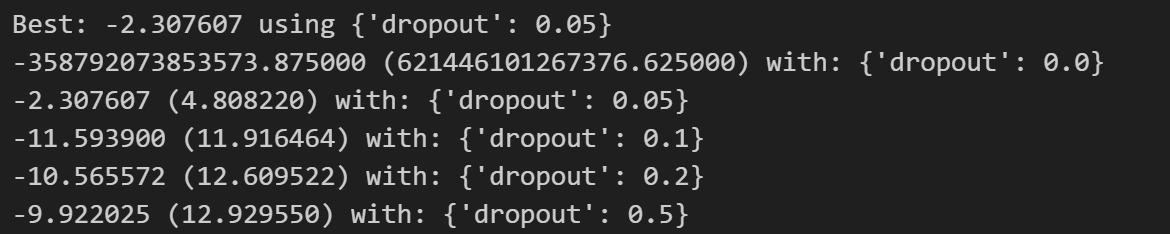![dropout.png](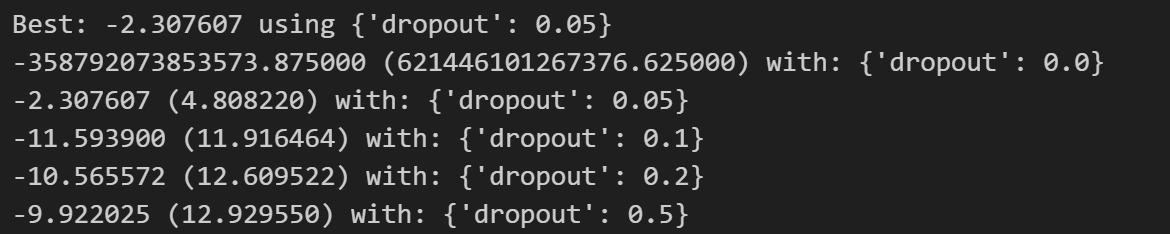![dropout.png](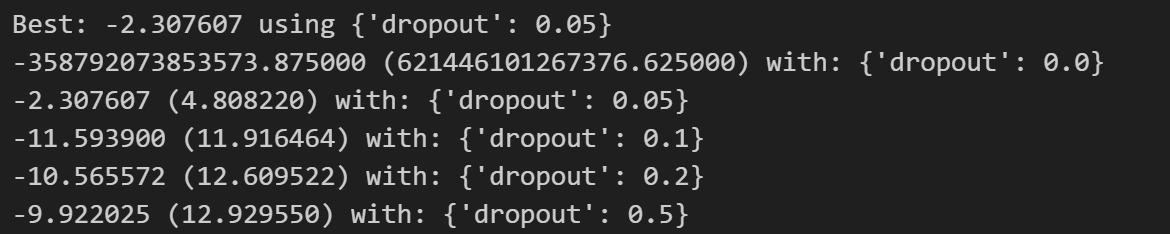![dropout.png](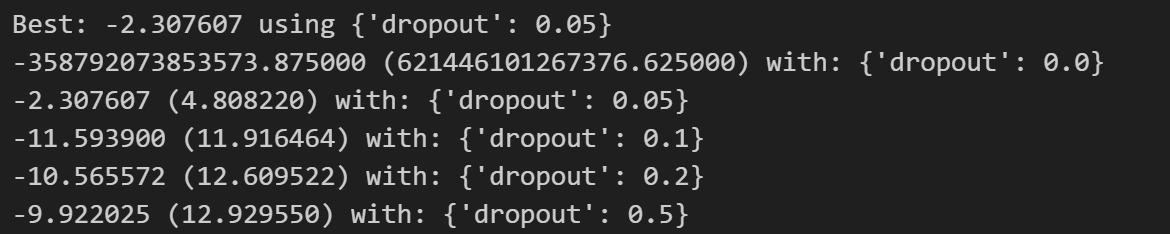![dropout.png](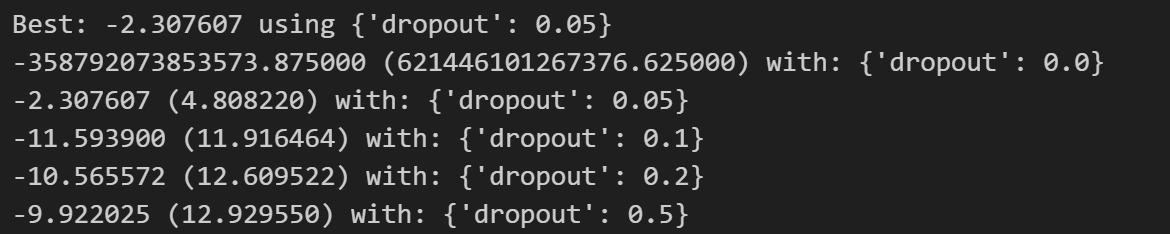![dropout.png](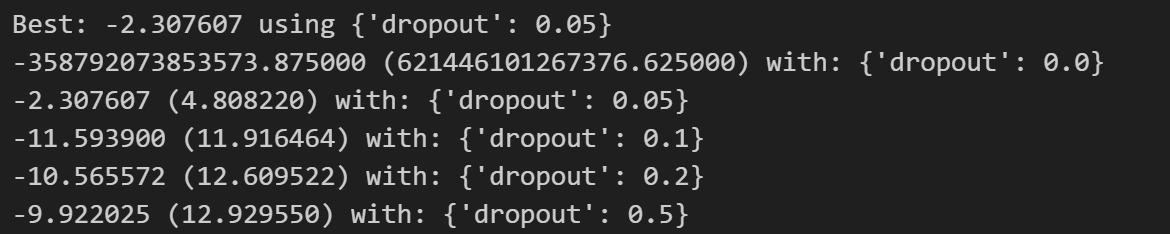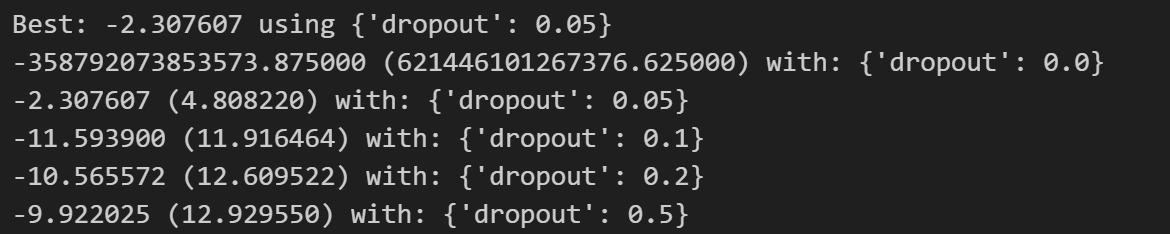))))))ss of algorithms that are used to find the best possible solution to a given problem. The goal of an optimization algorithm is to find the optimal solution that minimizes or maximizes a given objective function. They can be characterized as algorithms that try to find the most efficient solution when given a set of conditions or constraints. There are many different types of optimization algorithms, such as Gradient Descent, Stochastic Gradient Descent, Mini-batch Gradient Descent, Momentum, Adaptive Learning Rate Methods.
Why we should try several Optimization Algorithms? Different algorithms converge at different speeds and performance. We need to find the best algorithms which can reach the optimum faster, save time and computational resources. Avoiding local minima. Experimenting with various optimizers allows for more extensive hyperparameter tuning.

In [ ]:
# create model
### In the following model please specify the optimum values of epochs and batch_size
# hint: 100 is default value of epochs and must be updated from pervious step
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=64, verbose=1)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(optimizer=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv,verbose=2) ## no need random_state here, as it takes too much time
grid_result = grid.fit(trainX, trainY)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
6/6 [==============================] - 3s 61ms/step - loss: 0.0059 - mse: 0.0059
Epoch 2/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0043 - mse: 0.0043
Epoch 3/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0029 - mse: 0.0029
Epoch 4/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0019 - mse: 0.0019
Epoch 5/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0011 - mse: 0.0011
Epoch 6/100
6/6 [==============================] - 0s 61ms/step - loss: 8.9151e-04 - mse: 8.9151e-04
Epoch 7/100
6/6 [==============================] - 0s 58ms/step - loss: 5.9747e-04 - mse: 5.9747e-04
Epoch 8/100
6/6 [==============================] - 0s 62ms/step - loss: 6.3826e-04 - mse: 6.3826e-04
Epoch 9/100
6/6 [==============================] - 0s 59ms/step - loss: 5.4721e-04 - mse: 5.4721e-04
Epoch 10/100
6/6 [==============================] - 0s 59ms/step - loss: 5.7088e-04 - mse: 5.7088e-04
Epoch 11/100
6/6 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
11/11 [==============================] - 4s 66ms/step - loss: 0.0275 - mse: 0.0275
Epoch 2/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0231 - mse: 0.0231
Epoch 3/100
11/11 [==============================] - 1s 57ms/step - loss: 0.0181 - mse: 0.0181
Epoch 4/100
11/11 [==============================] - 1s 59ms/step - loss: 0.0120 - mse: 0.0120
Epoch 5/100
11/11 [==============================] - 1s 58ms/step - loss: 0.0080 - mse: 0.0080
Epoch 6/100
11/11 [==============================] - 1s 60ms/step - loss: 0.0066 - mse: 0.0066
Epoch 7/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0067 - mse: 0.0067
Epoch 8/100
11/11 [==============================] - 1s 60ms/step - loss: 0.0064 - mse: 0.0064
Epoch 9/100
11/11 [==============================] - 1s 59ms/step - loss: 0.0062 - mse: 0.0062
Epoch 10/100
11/11 [==============================] - 1s 59ms/step - loss: 0.0056 - mse: 0.0056
Epoch 11/100
11/11 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
17/17 [==============================] - 4s 59ms/step - loss: 0.0842 - mse: 0.0842
Epoch 2/100
17/17 [==============================] - 1s 58ms/step - loss: 0.0735 - mse: 0.0735
Epoch 3/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0621 - mse: 0.0621
Epoch 4/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0486 - mse: 0.0486
Epoch 5/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0409 - mse: 0.0409
Epoch 6/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0338 - mse: 0.0338
Epoch 7/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0262 - mse: 0.0262
Epoch 8/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0209 - mse: 0.0209
Epoch 9/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0163 - mse: 0.0163
Epoch 10/100
17/17 [==============================] - 1s 90ms/step - loss: 0.0128 - mse: 0.0128
Epoch 11/100
17/17 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
22/22 [==============================] - 4s 59ms/step - loss: 0.1341 - mse: 0.1341
Epoch 2/100
22/22 [==============================] - 1s 59ms/step - loss: 0.1084 - mse: 0.1084
Epoch 3/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0833 - mse: 0.0833
Epoch 4/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0560 - mse: 0.0560
Epoch 5/100
22/22 [==============================] - 2s 101ms/step - loss: 0.0307 - mse: 0.0307
Epoch 6/100
22/22 [==============================] - 2s 69ms/step - loss: 0.0196 - mse: 0.0196
Epoch 7/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0134 - mse: 0.0134
Epoch 8/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0144 - mse: 0.0144
Epoch 9/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0121 - mse: 0.0121
Epoch 10/100
22/22 [==============================] - 1s 59ms/step - loss: 0.0149 - mse: 0.0149
Epoch 11/100
22/22 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
6/6 [==============================] - 3s 64ms/step - loss: 0.0069 - mse: 0.0069
Epoch 2/100
6/6 [==============================] - 0s 59ms/step - loss: 0.0045 - mse: 0.0045
Epoch 3/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0024 - mse: 0.0024
Epoch 4/100
6/6 [==============================] - 0s 64ms/step - loss: 0.0011 - mse: 0.0011
Epoch 5/100
6/6 [==============================] - 0s 60ms/step - loss: 6.6000e-04 - mse: 6.6000e-04
Epoch 6/100
6/6 [==============================] - 0s 62ms/step - loss: 9.0926e-04 - mse: 9.0926e-04
Epoch 7/100
6/6 [==============================] - 0s 63ms/step - loss: 7.2591e-04 - mse: 7.2591e-04
Epoch 8/100
6/6 [==============================] - 0s 60ms/step - loss: 6.6254e-04 - mse: 6.6254e-04
Epoch 9/100
6/6 [==============================] - 0s 64ms/step - loss: 5.5095e-04 - mse: 5.5095e-04
Epoch 10/100
6/6 [==============================] - 0s 60ms/step - loss: 6.0395e-04 - mse: 6.0395e-04
Epoch 11/100
6/6 [===

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
11/11 [==============================] - 3s 63ms/step - loss: 0.0089 - mse: 0.0089
Epoch 2/100
11/11 [==============================] - 1s 60ms/step - loss: 0.0036 - mse: 0.0036
Epoch 3/100
11/11 [==============================] - 1s 64ms/step - loss: 0.0034 - mse: 0.0034
Epoch 4/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0026 - mse: 0.0026
Epoch 5/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0027 - mse: 0.0027
Epoch 6/100
11/11 [==============================] - 1s 64ms/step - loss: 0.0023 - mse: 0.0023
Epoch 7/100
11/11 [==============================] - 1s 94ms/step - loss: 0.0022 - mse: 0.0022
Epoch 8/100
11/11 [==============================] - 1s 106ms/step - loss: 0.0022 - mse: 0.0022
Epoch 9/100
11/11 [==============================] - 1s 82ms/step - loss: 0.0021 - mse: 0.0021
Epoch 10/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0019 - mse: 0.0019
Epoch 11/100
11/11 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
17/17 [==============================] - 4s 60ms/step - loss: 0.0290 - mse: 0.0290
Epoch 2/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0160 - mse: 0.0160
Epoch 3/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0127 - mse: 0.0127
Epoch 4/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0121 - mse: 0.0121
Epoch 5/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0095 - mse: 0.0095
Epoch 6/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0088 - mse: 0.0088
Epoch 7/100
17/17 [==============================] - 1s 63ms/step - loss: 0.0106 - mse: 0.0106
Epoch 8/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0082 - mse: 0.0082
Epoch 9/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0071 - mse: 0.0071
Epoch 10/100
17/17 [==============================] - 1s 80ms/step - loss: 0.0071 - mse: 0.0071
Epoch 11/100
17/17 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
22/22 [==============================] - 5s 96ms/step - loss: 0.1293 - mse: 0.1293
Epoch 2/100
22/22 [==============================] - 2s 72ms/step - loss: 0.0757 - mse: 0.0757
Epoch 3/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0340 - mse: 0.0340
Epoch 4/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0233 - mse: 0.0233
Epoch 5/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0143 - mse: 0.0143
Epoch 6/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0150 - mse: 0.0150
Epoch 7/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0133 - mse: 0.0133
Epoch 8/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0124 - mse: 0.0124
Epoch 9/100
22/22 [==============================] - 2s 71ms/step - loss: 0.0156 - mse: 0.0156
Epoch 10/100
22/22 [==============================] - 2s 100ms/step - loss: 0.0136 - mse: 0.0136
Epoch 11/100
22/22 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
6/6 [==============================] - 3s 63ms/step - loss: 0.0097 - mse: 0.0097
Epoch 2/100
6/6 [==============================] - 0s 59ms/step - loss: 0.0070 - mse: 0.0070
Epoch 3/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0061 - mse: 0.0061
Epoch 4/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0053 - mse: 0.0053
Epoch 5/100
6/6 [==============================] - 0s 59ms/step - loss: 0.0045 - mse: 0.0045
Epoch 6/100
6/6 [==============================] - 1s 95ms/step - loss: 0.0039 - mse: 0.0039
Epoch 7/100
6/6 [==============================] - 1s 104ms/step - loss: 0.0033 - mse: 0.0033
Epoch 8/100
6/6 [==============================] - 1s 103ms/step - loss: 0.0028 - mse: 0.0028
Epoch 9/100
6/6 [==============================] - 1s 104ms/step - loss: 0.0023 - mse: 0.0023
Epoch 10/100
6/6 [==============================] - 0s 72ms/step - loss: 0.0019 - mse: 0.0019
Epoch 11/100
6/6 [==============================] - 0s 61ms/step -

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
11/11 [==============================] - 3s 60ms/step - loss: 0.0058 - mse: 0.0058
Epoch 2/100
11/11 [==============================] - 1s 68ms/step - loss: 0.0049 - mse: 0.0049
Epoch 3/100
11/11 [==============================] - 1s 97ms/step - loss: 0.0035 - mse: 0.0035
Epoch 4/100
11/11 [==============================] - 1s 98ms/step - loss: 0.0039 - mse: 0.0039
Epoch 5/100
11/11 [==============================] - 1s 68ms/step - loss: 0.0030 - mse: 0.0030
Epoch 6/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0027 - mse: 0.0027
Epoch 7/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0025 - mse: 0.0025
Epoch 8/100
11/11 [==============================] - 1s 60ms/step - loss: 0.0027 - mse: 0.0027
Epoch 9/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0025 - mse: 0.0025
Epoch 10/100
11/11 [==============================] - 1s 58ms/step - loss: 0.0024 - mse: 0.0024
Epoch 11/100
11/11 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
17/17 [==============================] - 4s 61ms/step - loss: 0.0992 - mse: 0.0992
Epoch 2/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0816 - mse: 0.0816
Epoch 3/100
17/17 [==============================] - 1s 85ms/step - loss: 0.0724 - mse: 0.0724
Epoch 4/100
17/17 [==============================] - 2s 98ms/step - loss: 0.0660 - mse: 0.0660
Epoch 5/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0603 - mse: 0.0603
Epoch 6/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0553 - mse: 0.0553
Epoch 7/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0508 - mse: 0.0508
Epoch 8/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0470 - mse: 0.0470
Epoch 9/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0437 - mse: 0.0437
Epoch 10/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0407 - mse: 0.0407
Epoch 11/100
17/17 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
22/22 [==============================] - 5s 63ms/step - loss: 0.1389 - mse: 0.1389
Epoch 2/100
22/22 [==============================] - 1s 63ms/step - loss: 0.1203 - mse: 0.1203
Epoch 3/100
22/22 [==============================] - 1s 62ms/step - loss: 0.1014 - mse: 0.1014
Epoch 4/100
22/22 [==============================] - 1s 64ms/step - loss: 0.0812 - mse: 0.0812
Epoch 5/100
22/22 [==============================] - 2s 69ms/step - loss: 0.0473 - mse: 0.0473
Epoch 6/100
22/22 [==============================] - 2s 102ms/step - loss: 0.0167 - mse: 0.0167
Epoch 7/100
22/22 [==============================] - 1s 64ms/step - loss: 0.0146 - mse: 0.0146
Epoch 8/100
22/22 [==============================] - 1s 64ms/step - loss: 0.0135 - mse: 0.0135
Epoch 9/100
22/22 [==============================] - 1s 66ms/step - loss: 0.0162 - mse: 0.0162
Epoch 10/100
22/22 [==============================] - 1s 65ms/step - loss: 0.0146 - mse: 0.0146
Epoch 11/100
22/22 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
6/6 [==============================] - 4s 63ms/step - loss: 0.0080 - mse: 0.0080
Epoch 2/100
6/6 [==============================] - 0s 65ms/step - loss: 0.0070 - mse: 0.0070
Epoch 3/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0061 - mse: 0.0061
Epoch 4/100
6/6 [==============================] - 0s 63ms/step - loss: 0.0052 - mse: 0.0052
Epoch 5/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0045 - mse: 0.0045
Epoch 6/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0038 - mse: 0.0038
Epoch 7/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0032 - mse: 0.0032
Epoch 8/100
6/6 [==============================] - 0s 64ms/step - loss: 0.0027 - mse: 0.0027
Epoch 9/100
6/6 [==============================] - 0s 64ms/step - loss: 0.0023 - mse: 0.0023
Epoch 10/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0019 - mse: 0.0019
Epoch 11/100
6/6 [==============================] - 0s 62ms/step - lo

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
11/11 [==============================] - 3s 62ms/step - loss: 0.0283 - mse: 0.0283
Epoch 2/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0253 - mse: 0.0253
Epoch 3/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0225 - mse: 0.0225
Epoch 4/100
11/11 [==============================] - 1s 85ms/step - loss: 0.0200 - mse: 0.0200
Epoch 5/100
11/11 [==============================] - 1s 105ms/step - loss: 0.0179 - mse: 0.0179
Epoch 6/100
11/11 [==============================] - 1s 84ms/step - loss: 0.0160 - mse: 0.0160
Epoch 7/100
11/11 [==============================] - 1s 59ms/step - loss: 0.0144 - mse: 0.0144
Epoch 8/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0130 - mse: 0.0130
Epoch 9/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0119 - mse: 0.0119
Epoch 10/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0109 - mse: 0.0109
Epoch 11/100
11/11 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
17/17 [==============================] - 5s 102ms/step - loss: 0.0795 - mse: 0.0795
Epoch 2/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0546 - mse: 0.0546
Epoch 3/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0280 - mse: 0.0280
Epoch 4/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0152 - mse: 0.0152
Epoch 5/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0123 - mse: 0.0123
Epoch 6/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0114 - mse: 0.0114
Epoch 7/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0129 - mse: 0.0129
Epoch 8/100
17/17 [==============================] - 1s 60ms/step - loss: 0.0105 - mse: 0.0105
Epoch 9/100
17/17 [==============================] - 1s 61ms/step - loss: 0.0093 - mse: 0.0093
Epoch 10/100
17/17 [==============================] - 1s 64ms/step - loss: 0.0094 - mse: 0.0094
Epoch 11/100
17/17 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
22/22 [==============================] - 4s 62ms/step - loss: 0.0878 - mse: 0.0878
Epoch 2/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0356 - mse: 0.0356
Epoch 3/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0158 - mse: 0.0158
Epoch 4/100
22/22 [==============================] - 1s 63ms/step - loss: 0.0151 - mse: 0.0151
Epoch 5/100
22/22 [==============================] - 2s 95ms/step - loss: 0.0115 - mse: 0.0115
Epoch 6/100
22/22 [==============================] - 2s 73ms/step - loss: 0.0118 - mse: 0.0118
Epoch 7/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0106 - mse: 0.0106
Epoch 8/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0105 - mse: 0.0105
Epoch 9/100
22/22 [==============================] - 1s 60ms/step - loss: 0.0112 - mse: 0.0112
Epoch 10/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0115 - mse: 0.0115
Epoch 11/100
22/22 [=============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
6/6 [==============================] - 4s 60ms/step - loss: 0.0062 - mse: 0.0062
Epoch 2/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0045 - mse: 0.0045
Epoch 3/100
6/6 [==============================] - 0s 60ms/step - loss: 0.0030 - mse: 0.0030
Epoch 4/100
6/6 [==============================] - 0s 62ms/step - loss: 0.0018 - mse: 0.0018
Epoch 5/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0011 - mse: 0.0011
Epoch 6/100
6/6 [==============================] - 0s 59ms/step - loss: 8.4165e-04 - mse: 8.4165e-04
Epoch 7/100
6/6 [==============================] - 0s 61ms/step - loss: 6.3064e-04 - mse: 6.3064e-04
Epoch 8/100
6/6 [==============================] - 0s 63ms/step - loss: 7.1518e-04 - mse: 7.1518e-04
Epoch 9/100
6/6 [==============================] - 0s 62ms/step - loss: 6.0032e-04 - mse: 6.0032e-04
Epoch 10/100
6/6 [==============================] - 0s 64ms/step - loss: 6.0906e-04 - mse: 6.0906e-04
Epoch 11/100
6/6 [===========

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
11/11 [==============================] - 3s 62ms/step - loss: 0.0617 - mse: 0.0617
Epoch 2/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0436 - mse: 0.0436
Epoch 3/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0329 - mse: 0.0329
Epoch 4/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0263 - mse: 0.0263
Epoch 5/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0219 - mse: 0.0219
Epoch 6/100
11/11 [==============================] - 1s 104ms/step - loss: 0.0190 - mse: 0.0190
Epoch 7/100
11/11 [==============================] - 1s 99ms/step - loss: 0.0169 - mse: 0.0169
Epoch 8/100
11/11 [==============================] - 1s 71ms/step - loss: 0.0152 - mse: 0.0152
Epoch 9/100
11/11 [==============================] - 1s 60ms/step - loss: 0.0137 - mse: 0.0137
Epoch 10/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0126 - mse: 0.0126
Epoch 11/100
11/11 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
17/17 [==============================] - 4s 66ms/step - loss: 0.0883 - mse: 0.0883
Epoch 2/100
17/17 [==============================] - 1s 65ms/step - loss: 0.0757 - mse: 0.0757
Epoch 3/100
17/17 [==============================] - 1s 65ms/step - loss: 0.0641 - mse: 0.0641
Epoch 4/100
17/17 [==============================] - 1s 76ms/step - loss: 0.0499 - mse: 0.0499
Epoch 5/100
17/17 [==============================] - 2s 108ms/step - loss: 0.0301 - mse: 0.0301
Epoch 6/100
17/17 [==============================] - 1s 68ms/step - loss: 0.0295 - mse: 0.0295
Epoch 7/100
17/17 [==============================] - 1s 66ms/step - loss: 0.0262 - mse: 0.0262
Epoch 8/100
17/17 [==============================] - 1s 64ms/step - loss: 0.0233 - mse: 0.0233
Epoch 9/100
17/17 [==============================] - 1s 66ms/step - loss: 0.0219 - mse: 0.0219
Epoch 10/100
17/17 [==============================] - 1s 65ms/step - loss: 0.0197 - mse: 0.0197
Epoch 11/100
17/17 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
22/22 [==============================] - 4s 62ms/step - loss: 0.1200 - mse: 0.1200
Epoch 2/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0865 - mse: 0.0865
Epoch 3/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0553 - mse: 0.0553
Epoch 4/100
22/22 [==============================] - 1s 64ms/step - loss: 0.0286 - mse: 0.0286
Epoch 5/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0192 - mse: 0.0192
Epoch 6/100
22/22 [==============================] - 2s 70ms/step - loss: 0.0177 - mse: 0.0177
Epoch 7/100
22/22 [==============================] - 2s 100ms/step - loss: 0.0190 - mse: 0.0190
Epoch 8/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0183 - mse: 0.0183
Epoch 9/100
22/22 [==============================] - 1s 64ms/step - loss: 0.0165 - mse: 0.0165
Epoch 10/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0212 - mse: 0.0212
Epoch 11/100
22/22 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
6/6 [==============================] - 4s 73ms/step - loss: 0.0048 - mse: 0.0048
Epoch 2/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0027 - mse: 0.0027
Epoch 3/100
6/6 [==============================] - 0s 61ms/step - loss: 0.0013 - mse: 0.0013
Epoch 4/100
6/6 [==============================] - 0s 62ms/step - loss: 7.7990e-04 - mse: 7.7990e-04
Epoch 5/100
6/6 [==============================] - 0s 66ms/step - loss: 8.2175e-04 - mse: 8.2175e-04
Epoch 6/100
6/6 [==============================] - 0s 61ms/step - loss: 8.7453e-04 - mse: 8.7453e-04
Epoch 7/100
6/6 [==============================] - 0s 64ms/step - loss: 6.1655e-04 - mse: 6.1655e-04
Epoch 8/100
6/6 [==============================] - 0s 65ms/step - loss: 6.3092e-04 - mse: 6.3092e-04
Epoch 9/100
6/6 [==============================] - 0s 60ms/step - loss: 5.8770e-04 - mse: 5.8770e-04
Epoch 10/100
6/6 [==============================] - 0s 61ms/step - loss: 6.6012e-04 - mse: 6.6012e-04
Epoch 11/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
11/11 [==============================] - 3s 61ms/step - loss: 0.0283 - mse: 0.0283
Epoch 2/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0253 - mse: 0.0253
Epoch 3/100
11/11 [==============================] - 1s 64ms/step - loss: 0.0225 - mse: 0.0225
Epoch 4/100
11/11 [==============================] - 1s 64ms/step - loss: 0.0200 - mse: 0.0200
Epoch 5/100
11/11 [==============================] - 1s 101ms/step - loss: 0.0179 - mse: 0.0179
Epoch 6/100
11/11 [==============================] - 1s 109ms/step - loss: 0.0160 - mse: 0.0160
Epoch 7/100
11/11 [==============================] - 1s 67ms/step - loss: 0.0144 - mse: 0.0144
Epoch 8/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0130 - mse: 0.0130
Epoch 9/100
11/11 [==============================] - 1s 63ms/step - loss: 0.0119 - mse: 0.0119
Epoch 10/100
11/11 [==============================] - 1s 62ms/step - loss: 0.0109 - mse: 0.0109
Epoch 11/100
11/11 [===========================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
17/17 [==============================] - 4s 62ms/step - loss: 0.0869 - mse: 0.0869
Epoch 2/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0615 - mse: 0.0615
Epoch 3/100
17/17 [==============================] - 1s 63ms/step - loss: 0.0419 - mse: 0.0419
Epoch 4/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0253 - mse: 0.0253
Epoch 5/100
17/17 [==============================] - 1s 64ms/step - loss: 0.0205 - mse: 0.0205
Epoch 6/100
17/17 [==============================] - 1s 63ms/step - loss: 0.0169 - mse: 0.0169
Epoch 7/100
17/17 [==============================] - 1s 62ms/step - loss: 0.0134 - mse: 0.0134
Epoch 8/100
17/17 [==============================] - 1s 64ms/step - loss: 0.0091 - mse: 0.0091
Epoch 9/100
17/17 [==============================] - 1s 65ms/step - loss: 0.0089 - mse: 0.0089
Epoch 10/100
17/17 [==============================] - 2s 105ms/step - loss: 0.0082 - mse: 0.0082
Epoch 11/100
17/17 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
22/22 [==============================] - 4s 64ms/step - loss: 0.1431 - mse: 0.1431
Epoch 2/100
22/22 [==============================] - 1s 62ms/step - loss: 0.1297 - mse: 0.1297
Epoch 3/100
22/22 [==============================] - 2s 102ms/step - loss: 0.1176 - mse: 0.1176
Epoch 4/100
22/22 [==============================] - 1s 65ms/step - loss: 0.1069 - mse: 0.1069
Epoch 5/100
22/22 [==============================] - 1s 63ms/step - loss: 0.0975 - mse: 0.0975
Epoch 6/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0890 - mse: 0.0890
Epoch 7/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0818 - mse: 0.0818
Epoch 8/100
22/22 [==============================] - 1s 61ms/step - loss: 0.0753 - mse: 0.0753
Epoch 9/100
22/22 [==============================] - 1s 63ms/step - loss: 0.0697 - mse: 0.0697
Epoch 10/100
22/22 [==============================] - 1s 62ms/step - loss: 0.0649 - mse: 0.0649
Epoch 11/100
22/22 [============================

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/100
27/27 [==============================] - 4s 63ms/step - loss: 0.2475 - mse: 0.2475
Epoch 2/100
27/27 [==============================] - 2s 62ms/step - loss: 0.2006 - mse: 0.2006
Epoch 3/100
27/27 [==============================] - 2s 62ms/step - loss: 0.1805 - mse: 0.1805
Epoch 4/100
27/27 [==============================] - 3s 100ms/step - loss: 0.1644 - mse: 0.1644
Epoch 5/100
27/27 [==============================] - 2s 61ms/step - loss: 0.1502 - mse: 0.1502
Epoch 6/100
27/27 [==============================] - 2s 63ms/step - loss: 0.1374 - mse: 0.1374
Epoch 7/100
27/27 [==============================] - 2s 62ms/step - loss: 0.1262 - mse: 0.1262
Epoch 8/100
27/27 [==============================] - 2s 62ms/step - loss: 0.1164 - mse: 0.1164
Epoch 9/100
27/27 [==============================] - 2s 62ms/step - loss: 0.1077 - mse: 0.1077
Epoch 10/100
27/27 [==============================] - 2s 68ms/step - loss: 0.1003 - mse: 0.1003
Epoch 11/100
27/27 [============================

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

  # what is the best optimizer, you need to use it in the next steps.
  # The best optimizer is RMSprop

Best: -0.383528 using {'optimizer': 'RMSprop'}
-501.134717 (863.851533) with: {'optimizer': 'SGD'}
-0.383528 (0.829706) with: {'optimizer': 'RMSprop'}
-71.079797 (118.954862) with: {'optimizer': 'Adagrad'}
-8.460333 (13.982376) with: {'optimizer': 'Adadelta'}
-8.792377 (14.990820) with: {'optimizer': 'Adam'}
-9.449364 (13.549774) with: {'optimizer': 'Nadam'}


### Dropout

In [ ]:
###Question 18: why we should use Dropout?

##Question 18
Dropout is a regularization technique used in neural networks to prevent overfitting.We should use dropout for several reasons. First, dropout can prevent units from co-adapting too much, which means that the network doesn't rely on any single feature or neuron, thereby reducing the chances of overfitting. Second, dropout can vary the network to become more robust and less sensitive to specific weights of neurons. Third, dropout forces the network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons. Fourth, dropout provides a way to train an ensemble of models in a computationally efficient way.

In [ ]:
###Question 19: Explain how 'Dropout' works ?

# Question 19
During training, Dropout randomly sets a proportion of the neurons in a given layer to zero during forward pass. The probability of setting any given neuron to zero is defined by the dropout rate, a hyperparameter typically set between 0 and 1.

In [ ]:
# create model
## Find the optimum value of dropout
### In the following model please specify the optimum values of epochs, batch_size and optimizer

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=16, verbose=1,optimizer='RMSprop', dropout=None)

# define the grid search parameters
drops = [0.0, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dropout=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv,verbose=2)
grid_result = grid.fit(trainX, trainY)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## The best dropout level is 0.05.

This code takes a lot of time to run, instead of run it here, we show the results.

It shows that the best dropout value is 0.05

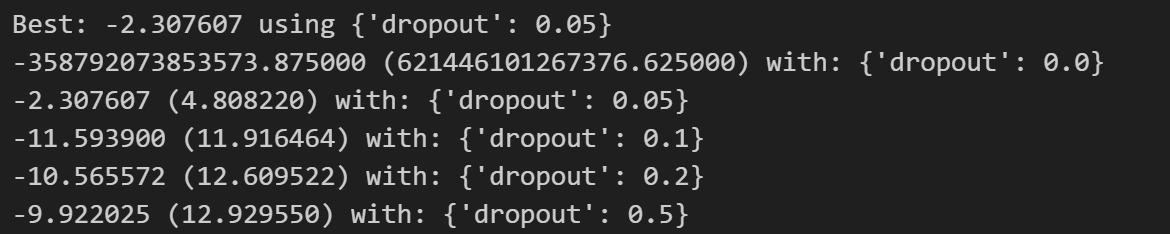

### Hidden neurons

In [ ]:
###Question 20: Explain how we can determine the opimum number of hidden layers?

In [ ]:
# create model
## Check this step, try to find optimum number of hidden layers (if it is possible)
model = KerasRegressor(build_fn=create_model,
                        epochs=100, batch_size=16, verbose=1,optimizer='RMSprop', dropout=0.05, dense_layer_sizes=None)

# define the grid search parameters
layers = [(10,), (20,), (30,)]
param_grid = dict(dense_layer_sizes=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=tscv, verbose=2)
grid_result = grid.fit(trainX, trainY)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -2.889337 using {'dense_layer_sizes': (10,)}
-2.889337 (2.446334) with: {'dense_layer_sizes': (10,)}
-370.379920 (618.713271) with: {'dense_layer_sizes': (20,)}
-9.947711 (12.918514) with: {'dense_layer_sizes': (30,)}


#Question20
Determining the optimal number of hidden layers, usually requires experimentation and evaluation. Here are some common methods to determine the optimal number of hidden layers:
1.Empirical Rule: A common empirical rule is to start with a small number of hidden layers and gradually increase the number of hidden layers until the model's performance no longer improves. Typically, you can start with a simple model containing 1 to 2 hidden layers.
2.Cross-Validation: Use cross-validation to evaluate the performance of different numbers of hidden layers. By splitting the dataset into training and validation sets, training the model on each number of hidden layers, and evaluating the model's performance on the validation set, you can determine which number of hidden layers produces the best generalization performance.
3.Grid Search: Systematically search different combinations of hidden layer numbers using grid search and evaluate the performance of each combination. This can be done by training the model on each number of hidden layers and evaluating performance using cross-validation. Grid search can help find the best combination of hidden layer numbers to maximize model performance.
4.Pretrained Models: Pretrain models on large datasets, then use transfer learning to apply the models to target tasks. In this case, you can use the number of hidden layers in the pretrained model as the initial number of hidden layers and adjust or fine-tune the number of hidden layers based on the performance of the target task.
In conclusion, selecting the optimal number of hidden layers requires experimentation and evaluation, taking into account the complexity of the problem, the size of the dataset, and the model's generalization ability. Through multiple experiments and adjustments, the optimal number of hidden layers can be found to maximize model performance and prediction accuracy.

# Output Final Predictions

Firstly, we do the grid search using 10th day prediction dataset, but we fit and predict the best model using the 1st day prediction dataset.

Secondly, when creating the grid search model, the neurons in LSTM layer was 3, but in the best model it was 25 and 30, we perform times series cross validation as validation data.

In [ ]:
# Transforming data
training_set3 = df.iloc[:round(len(df)*PercentageIntrainingData)].values
scaler3 = MinMaxScaler(feature_range=(0, 1))
training_set3 = scaler3.fit_transform(training_set3)

### Select number of days we want to predict into the future and number of past days we want to use to predict the future

in_future3 = 1 # Number of days we want to predict into the future
in_past3 = 120 # Number of past days we want to use to predict the future

# Here, we are going to make such arrangement with the training dataset that previous 120 Days will be used to predict the next 10 days.

trainX3 = []
trainY3 = []



for i in range(in_past3, len(training_set3) - in_future3 +1):
    trainX3.append(training_set3[i - in_past3:i, 0:training_set3.shape[1]])
    trainY3.append(training_set3[i + in_future3 - 1:i + in_future3, 0])

trainX3, trainY3 = np.array(trainX3), np.array(trainY3)

print('trainX3 shape = {}.'.format(trainX3.shape))
print('trainY3 shape = {}.'.format(trainY3.shape))

# Perform time series cross-validation
for train_index, val_index in tscv.split(trainX3):
    X_train3, X_val3 = trainX3[train_index], trainX3[val_index]
    y_train3, y_val3 = trainY3[train_index], trainY3[val_index]

trainX3 shape = (1732, 120, 1).
trainY3 shape = (1732, 1).
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 120, 25)           2700      
                                                                 
 lstm_9 (LSTM)               (None, 30)                6720      
                                                                 
 dropout_8 (Dropout)         (None, 30)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                             

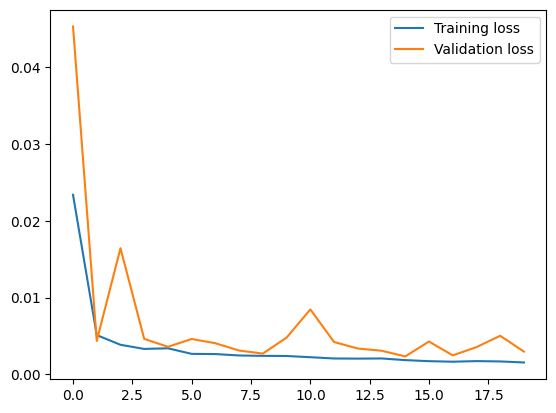

In [ ]:
###Question 21: According to your grid search, construct the deep learning with the best parameter values

# This is  a sample model, you need to modify this model
Bestmodel = Sequential()
#Bestmodel.add(LSTM(50, activation='relu', input_shape=(trainX.shape[0], trainX.shape[2]), return_sequences=True))
Bestmodel.add(LSTM(25, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
Bestmodel.add(LSTM(30, activation='relu', return_sequences=False))
Bestmodel.add(Dropout(0.05))
Bestmodel.add(Dense(10, activation='relu')) # Layer 1
Bestmodel.add(Dropout(0.05))
Bestmodel.add(Dense(1))
Bestmodel.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])
Bestmodel.summary()

In [ ]:
# train model on full train set, with 80/20 CV split
history3 = Bestmodel.fit(X_train3, y_train3, epochs=20, batch_size=16, validation_data= (X_val3, y_val3), verbose=1)

In [ ]:
# Ploting the loss function and valid set loss function
Mean_loss3 = np.mean(history3.history['loss'])
print("\n%s: %.2f%%" % ('Mean_loss', Mean_loss3*100))
Mean_val_loss3= np.mean(history3.history['val_loss'])
print("\n%s: %.2f%%" % ('Mean_val_loss', Mean_val_loss3*100))

plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend();

#Question21
Starting with the output final predictions, we use a similar approach to build the model and training it.
Firstly, a Sequential model is used, which is a simple linear stack of layers in Keras. Then, several LSTM layers are added, which are recurrent neural network layers suitable for sequence data. The parameters for each LSTM layer are set based on the best parameter values obtained from the grid search. Subsequently, some Dropout layers are added to prevent overfitting. Lastly, several Dense layers are added to create fully connected layers. The optimizer is set to RMSprop, the loss function is set to mean squared error (mse), and the mean squared error metric is calculated. After training the model, the average training loss and validation loss are printed, and a plot of the training and validation losses is created for visualization.

## Calculation of prediction interval(90% confidence level)

** For 90% confidence level, t-multiplier is 1.645 which is calculated from degree of freedom of the sample.


t-multiplier(1.645) * standard deviation(stdev) gives the magnitude of interval.

The minimum and maximum range is given by :
confidence min = value-interval
confidence max = value + interval

In [ ]:
test_data =df.iloc[round(len(df)*PercentageIntrainingData):,:].values
scaler = MinMaxScaler(feature_range=(0, 1))
test_data = scaler.fit_transform(test_data)

prediction_stocks = []

for i in range(in_past3, len(test_data)-in_future3+1):
    prediction_stocks.append(test_data[i-in_past3:i])

prediction_stocks = np.array(prediction_stocks)
print(prediction_stocks.shape)
#Now we are going to feed in the prediction dataset to the model.
predictions = Bestmodel.predict(prediction_stocks)

(343, 120, 1)
11/11 [==============================] - 1s 22ms/step


In [ ]:
0## Your code
Best_y_pred_future= scaler.inverse_transform(predictions)
Best_df_forecast = pd.DataFrame({'Date':dfs.Date[-Best_y_pred_future.shape[0]:],'Close':Best_y_pred_future[:,0]})
Best_df_forecast.head(3)

,Date,Close
Date,,
2022-11-01 00:00:00-04:00,2022-11-01 00:00:00-04:00,271.287567
2022-11-02 00:00:00-04:00,2022-11-02 00:00:00-04:00,274.131195
2022-11-03 00:00:00-04:00,2022-11-03 00:00:00-04:00,275.918762


In [ ]:
sum_err = np.sum((dfs.Close[-Best_y_pred_future.shape[0]:]-Best_df_forecast['Close'])**2)

print(sum_err)

x = (1/(len(Best_df_forecast))*sum_err)

stdev = np.sqrt(x)

interval = 	1.645*stdev

print(interval)

247226.3060852047
44.16377434950089


** Adding the Close Confidence Min and Close Confidence Max to the dataframe, Plus the original closing price data too.

In [ ]:
Best_df_forecast['Close Confidence Min'] = Best_df_forecast['Close'] - interval

Best_df_forecast['Close Confidence Max'] = Best_df_forecast['Close'] + interval

Best_df_forecast['Orginal Close'] = dfs.Close[-Best_y_pred_future.shape[0]:]

Best_df_forecast

,Date,Close,Close Confidence Min,Close Confidence Max,Orginal Close
Date,,,,,
2022-11-01 00:00:00-04:00,2022-11-01 00:00:00-04:00,271.287567,227.123795,315.451355,286.750000
2022-11-02 00:00:00-04:00,2022-11-02 00:00:00-04:00,274.131195,229.967422,318.294983,273.000000
2022-11-03 00:00:00-04:00,2022-11-03 00:00:00-04:00,275.918762,231.754990,320.082520,269.059998
2022-11-04 00:00:00-04:00,2022-11-04 00:00:00-04:00,276.455994,232.292221,320.619751,260.790009
2022-11-07 00:00:00-05:00,2022-11-07 00:00:00-05:00,275.838531,231.674759,320.002319,258.600006
...,...,...,...,...,...
2024-03-08 00:00:00-05:00,2024-03-08 00:00:00-05:00,577.808105,533.644348,621.971863,604.820007
2024-03-11 00:00:00-04:00,2024-03-11 00:00:00-04:00,578.996460,534.832703,623.160217,600.929993
2024-03-12 00:00:00-04:00,2024-03-12 00:00:00-04:00,579.665710,535.501953,623.829468,611.080017


** Ploting the Closing Price(Original and Predicted) with the Close Confidence Min as 'Lower Bound' and Close Confidence Max as 'Upper Bound' which gives the idea of the Model's 90% Confidence Level.

In [ ]:


fig3=go.Figure(data=[
                        go.Scatter(
                                    name = 'Close',
                                    x= Best_df_forecast['Date'],
                                    y= Best_df_forecast['Orginal Close']),

                        go.Scatter(
                                    name = 'Close Predicted',
                                    x= Best_df_forecast['Date'],
                                    y= Best_df_forecast['Close']),

                        go.Scatter(
                                    name='Upper Bound',
                                    x= Best_df_forecast['Date'],
                                    y= Best_df_forecast['Close Confidence Max'],
                                    mode='lines',
                                    marker=dict(color="green"),
                                    line=dict(width=1),
                                    showlegend=False),

                         go.Scatter(
                                    name='Lower Bound',
                                    x= Best_df_forecast['Date'],
                                    y= Best_df_forecast['Close Confidence Min'],
                                    marker=dict(color="purple"),
                                    line=dict(width=1),
                                    mode='lines',
                                    fillcolor='rgba(68, 68, 68, 0.3)',
                                    fill='tonexty',
                                    showlegend=False)

                    ])

fig3.show()

###Question 22:  Calculation of prediction interval for your preduction and explain the whole process of Forecasting with LSTM


#Question22
The prediction interval is 44. Initially, the test data is normalized and transformed into a suitable format for input to the model. Subsequently, the pre-trained LSTM model is employed to predict the data, yielding forecasted results for a specified future time frame. Following this, the predictions are inverse-transformed to obtain the actual forecasted values. Lastly, the code computes the prediction interval at a 90% confidence level and stores the results in a DataFrame for further analysis and visualization.

The forecasting gives good results, from November 2022 to mid January 2024 the predicitions are almost similar to the real close price. In January 25 the stock had a big jump that was not expected and was out of the interval confidence, but our model was able to finish the time line in the same interval as the real close price.